#Stock Market Analysis And Forecasting 
A stock market, equity market, or share market is the aggregation of buyers and sellers of stocks (also called shares), which represent ownership claims on businesses; these may include securities listed on a public stock exchange, as well as stock that is only traded privately, such as shares of private companies which are sold to investors through equity crowdfunding platforms. Investment in the stock market is most often done via stockbrokerages and electronic trading platforms. Investment is usually made with an investment strategy in mind.

The task of stock prediction has always been a challenging
problem for statistics experts and nance. The main reason
behind this prediction is buying stocks that are likely to
increase in price and then selling stocks that are probably
to fall. Generally, there are two ways for stock market prediction.
Fundamental analysis is one of them and relies on a
company's technique and fundamental information like market position, expenses and annual growth rates. The second
one is the technical analysis method, which concentrates on
previous stock prices and values.

In the first part of our project, we will try to analyze the data. and in the second part, we will forecast the stock market.

#Dataset
 1. Google
 2. Microsoft
 3. IBM
 4. Amazon
  

#Analysis 

We will find the distribution of close and open. Then we will find the correlation between close and open. After that, we will visualize the attributes[Open, High, Low, Close, volume] of our datasets. Then we compare the "High" and "Close" of each datasets. At last, we will find the trend and seasonality in the dataset.

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [2]:
google = pd.read_csv('GOOGL_2006-01-01_to_2018-01-01.csv', index_col='Date', parse_dates=['Date'])
google.head()

,Open,High,Low,Close,Volume,Name
Date,,,,,,
2006-01-03,211.47,218.05,209.32,217.83,13137450,GOOGL
2006-01-04,222.17,224.70,220.09,222.84,15292353,GOOGL
2006-01-05,223.22,226.00,220.97,225.85,10815661,GOOGL
2006-01-06,228.66,235.49,226.85,233.06,17759521,GOOGL
2006-01-09,233.44,236.94,230.70,233.68,12795837,GOOGL


In [3]:
microsoft = pd.read_csv('MSFT_2006-01-01_to_2018-01-01.csv', index_col='Date', parse_dates=['Date'])
microsoft.head()

,Open,High,Low,Close,Volume,Name
Date,,,,,,
2006-01-03,26.25,27.00,26.10,26.84,79974418,MSFT
2006-01-04,26.77,27.08,26.77,26.97,57975661,MSFT
2006-01-05,26.96,27.13,26.91,26.99,48247610,MSFT
2006-01-06,26.89,27.00,26.49,26.91,100969092,MSFT
2006-01-09,26.93,27.07,26.76,26.86,55627836,MSFT


In [4]:
amazon = pd.read_csv('AMZN_2006-01-01_to_2018-01-01.csv', index_col='Date', parse_dates=['Date'])
amazon.head()

,Open,High,Low,Close,Volume,Name
Date,,,,,,
2006-01-03,47.47,47.85,46.25,47.58,7582127,AMZN
2006-01-04,47.48,47.73,46.69,47.25,7440914,AMZN
2006-01-05,47.16,48.20,47.11,47.65,5417258,AMZN
2006-01-06,47.97,48.58,47.32,47.87,6154285,AMZN
2006-01-09,46.55,47.10,46.40,47.08,8945056,AMZN


In [5]:
ibm = pd.read_csv('IBM_2006-01-01_to_2018-01-01.csv', index_col='Date', parse_dates=['Date'])
ibm.head()

,Open,High,Low,Close,Volume,Name
Date,,,,,,
2006-01-03,82.45,82.55,80.81,82.06,11715200,IBM
2006-01-04,82.20,82.50,81.33,81.95,9840600,IBM
2006-01-05,81.40,82.90,81.00,82.50,7213500,IBM
2006-01-06,83.95,85.03,83.41,84.95,8197400,IBM
2006-01-09,84.10,84.25,83.38,83.73,6858200,IBM


In [6]:
google.describe()

,Open,High,Low,Close,Volume
count,3019.000000,3019.000000,3019.000000,3019.000000,3.019000e+03
mean,428.200802,431.835618,424.130275,428.044001,3.551504e+06
std,236.320026,237.514087,234.923747,236.343238,3.038599e+06
min,131.390000,134.820000,123.770000,128.850000,5.211410e+05
25%,247.775000,250.190000,244.035000,247.605000,1.760854e+06
50%,310.480000,312.810000,307.790000,310.080000,2.517630e+06
75%,572.140000,575.975000,565.900000,570.770000,4.242182e+06
max,1083.020000,1086.490000,1072.270000,1085.090000,4.118289e+07


After describing the google dataset, there is a high difference between the minimum and maximum values. And 75% of the value is close to the mean.

In [7]:
google.columns

Index(['Open', 'High', 'Low', 'Close', 'Volume', 'Name'], dtype='object')

In [8]:
google.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3019 entries, 2006-01-03 to 2017-12-29
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    3019 non-null   float64
 1   High    3019 non-null   float64
 2   Low     3019 non-null   float64
 3   Close   3019 non-null   float64
 4   Volume  3019 non-null   int64  
 5   Name    3019 non-null   object 
dtypes: float64(4), int64(1), object(1)
memory usage: 165.1+ KB


In [9]:
google.isna().sum()

Open      0
High      0
Low       0
Close     0
Volume    0
Name      0
dtype: int64

In [10]:
microsoft.describe()

,Open,High,Low,Close,Volume
count,3019.000000,3019.000000,3019.000000,3019.000000,3.019000e+03
mean,36.496817,36.827903,36.173190,36.513412,5.161762e+07
std,14.683337,14.742483,14.620057,14.694656,3.114958e+07
min,15.200000,15.620000,14.870000,15.150000,7.425603e+06
25%,26.785000,27.045000,26.535000,26.835000,3.136557e+07
50%,29.990000,30.230000,29.780000,30.000000,4.617529e+07
75%,44.545000,44.980000,44.090000,44.400000,6.322291e+07
max,87.120000,87.500000,86.230000,86.850000,5.910786e+08


Also same for the Microsoft dataset, there is a high difference between the minimum and maximum values. And 75% of the value is close to the mean.

In [11]:
microsoft.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3019 entries, 2006-01-03 to 2017-12-29
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    3019 non-null   float64
 1   High    3019 non-null   float64
 2   Low     3019 non-null   float64
 3   Close   3019 non-null   float64
 4   Volume  3019 non-null   int64  
 5   Name    3019 non-null   object 
dtypes: float64(4), int64(1), object(1)
memory usage: 165.1+ KB


In [12]:
microsoft.isna().sum()

Open      0
High      0
Low       0
Close     0
Volume    0
Name      0
dtype: int64

In [13]:
amazon.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3019 entries, 2006-01-03 to 2017-12-29
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    3019 non-null   float64
 1   High    3019 non-null   float64
 2   Low     3019 non-null   float64
 3   Close   3019 non-null   float64
 4   Volume  3019 non-null   int64  
 5   Name    3019 non-null   object 
dtypes: float64(4), int64(1), object(1)
memory usage: 165.1+ KB


In [14]:
amazon.describe()

,Open,High,Low,Close,Volume
count,3019.000000,3019.000000,3019.000000,3019.000000,3.019000e+03
mean,299.335310,302.371163,296.037695,299.376231,5.931712e+06
std,280.120547,281.826442,277.927134,279.980161,5.122034e+06
min,26.090000,26.300000,25.760000,26.070000,9.864350e+05
25%,81.175000,82.580000,79.725000,81.090000,3.137037e+06
50%,205.330000,208.000000,202.100000,205.440000,4.724100e+06
75%,375.570000,379.155000,373.000000,375.140000,7.135246e+06
max,1204.880000,1213.410000,1191.150000,1195.830000,1.044046e+08


Also same for the Amazon dataset, there is a high difference between the minimum and maximum values. And 75% of the value is close to the mean.

In [15]:
amazon.columns

Index(['Open', 'High', 'Low', 'Close', 'Volume', 'Name'], dtype='object')

In [16]:
amazon.isna().sum()

Open      0
High      0
Low       0
Close     0
Volume    0
Name      0
dtype: int64

In [17]:
ibm.describe()

,Open,High,Low,Close,Volume
count,3019.000000,3020.000000,3019.000000,3020.000000,3.020000e+03
mean,145.515545,146.681738,144.471597,145.617278,5.773301e+06
std,37.554946,37.613446,37.477641,37.529387,3.192831e+06
min,72.740000,73.940000,69.500000,71.740000,2.542560e+05
25%,116.405000,117.765000,115.490000,116.525000,3.622681e+06
50%,149.610000,150.330000,148.470000,149.315000,4.928852e+06
75%,178.445000,179.762500,177.330000,178.685000,6.965014e+06
max,215.380000,215.900000,214.300000,215.800000,3.077428e+07


But for the IBM dataset, we can see all the value is nearly close to the mean.

In [18]:
ibm.columns

Index(['Open', 'High', 'Low', 'Close', 'Volume', 'Name'], dtype='object')

In [19]:
ibm.isna().sum()

Open      1
High      0
Low       1
Close     0
Volume    0
Name      0
dtype: int64

In [20]:
ibm.dropna(inplace=True)


In [21]:
ibm.isna().sum()

Open      0
High      0
Low       0
Close     0
Volume    0
Name      0
dtype: int64

In [22]:
fig = px.histogram(google, 
                   x='Close', 
                   marginal='box', 
                   nbins=47, 
                   title='Distribution of Close')
fig.update_layout(bargap=0.1)
fig.show()

In [23]:
fig = px.histogram(google, 
                   x='Open', 
                   marginal='box', 
                   color_discrete_sequence=['red'], 
                   title='Distribution of open')
fig.update_layout(bargap=0.1)
fig.show()

In [24]:
fig = px.scatter(google, 
                 x='Open', 
                 y='Close', 
                 
                 opacity=0.8, 
                  
                 title='Open vs. Close')
fig.update_traces(marker_size=5)
fig.show()

There is a very high correlation between "Open" and "Close". As we can see from the scatter plot.

In [25]:
google.corr(numeric_only=True)

,Open,High,Low,Close,Volume
Open,1.000000,0.999894,0.999841,0.999742,-0.443155
High,0.999894,1.000000,0.999827,0.999866,-0.440717
Low,0.999841,0.999827,1.000000,0.999896,-0.447781
Close,0.999742,0.999866,0.999896,1.000000,-0.444590
Volume,-0.443155,-0.440717,-0.447781,-0.444590,1.000000


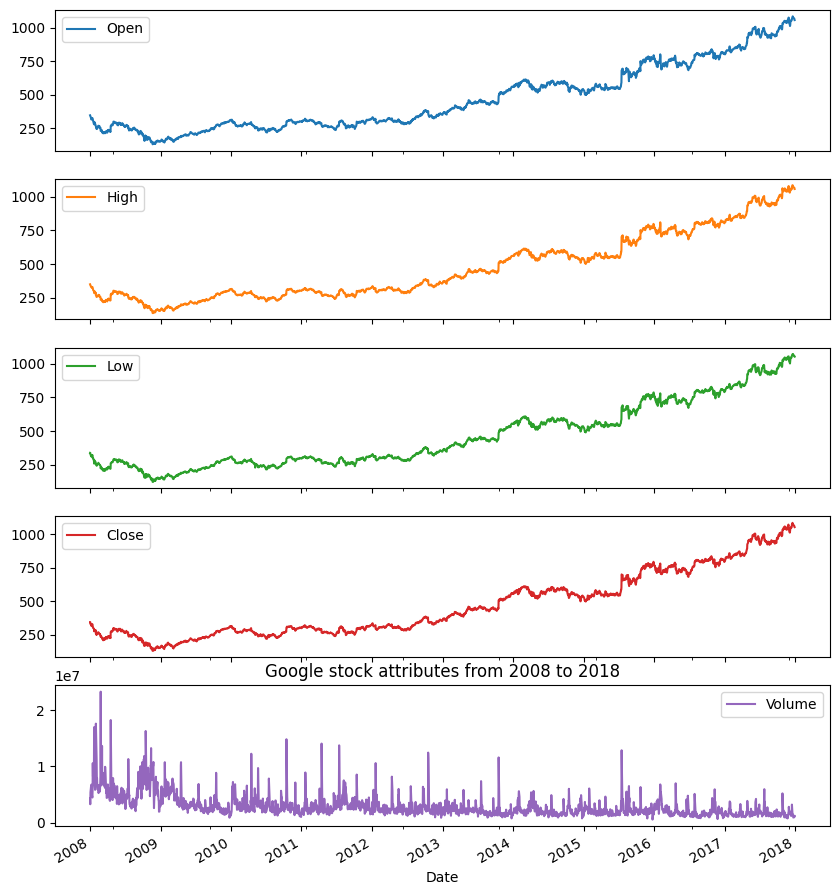

In [26]:
google['2008':'2018'].plot(subplots=True, figsize=(10,12))
plt.title('Google stock attributes from 2008 to 2018')
plt.show()

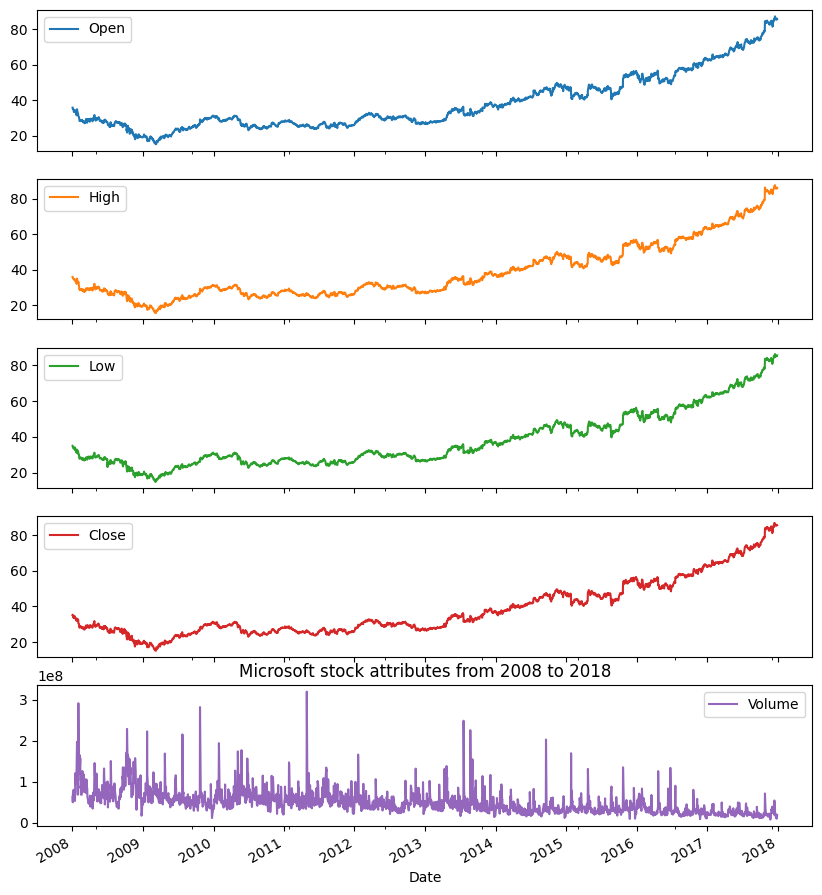

In [27]:
microsoft['2008':'2018'].plot(subplots=True, figsize=(10,12))
plt.title('Microsoft stock attributes from 2008 to 2018')
plt.show()

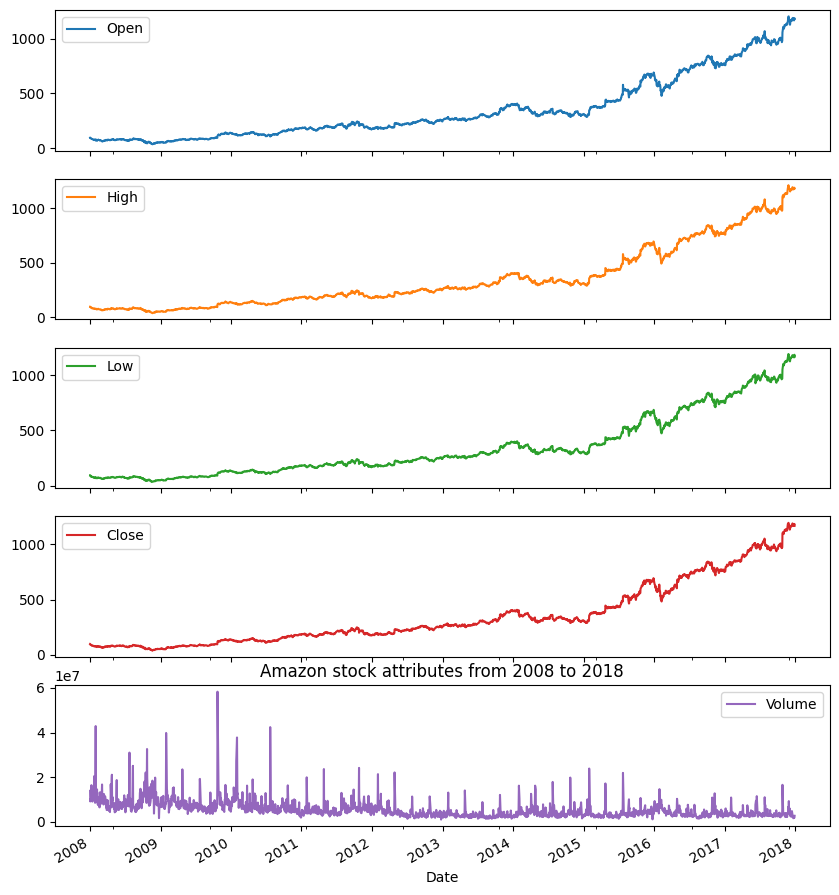

In [28]:
amazon['2008':'2018'].plot(subplots=True, figsize=(10,12))
plt.title('Amazon stock attributes from 2008 to 2018')
plt.show()

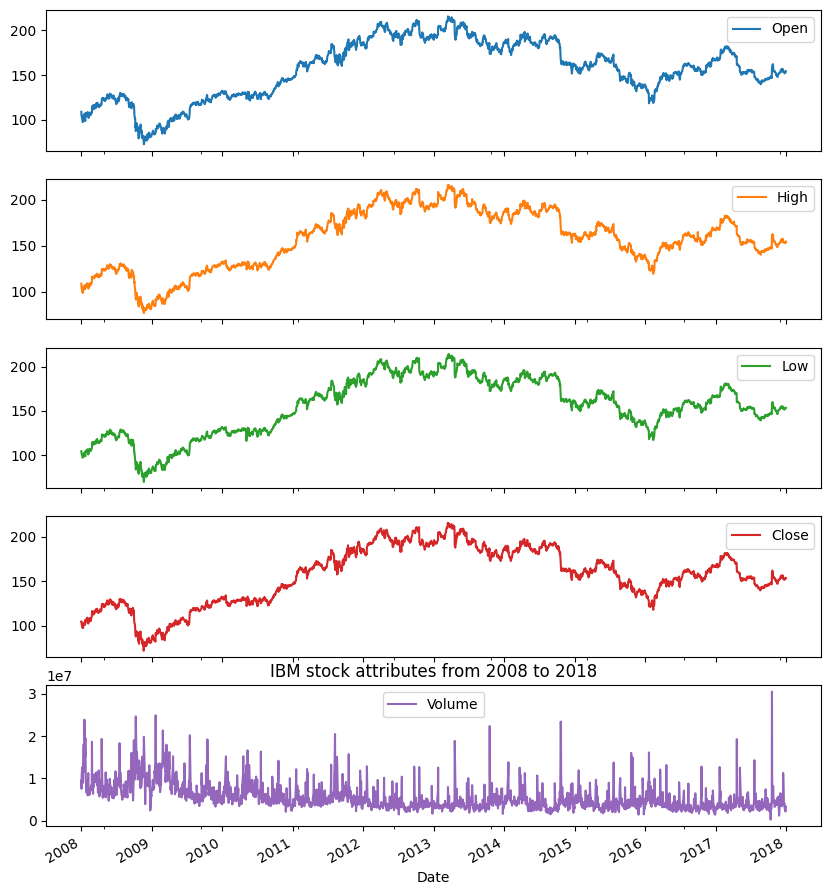

In [29]:
ibm['2008':'2018'].plot(subplots=True, figsize=(10,12))
plt.title('IBM stock attributes from 2008 to 2018')
plt.show()

###High plot

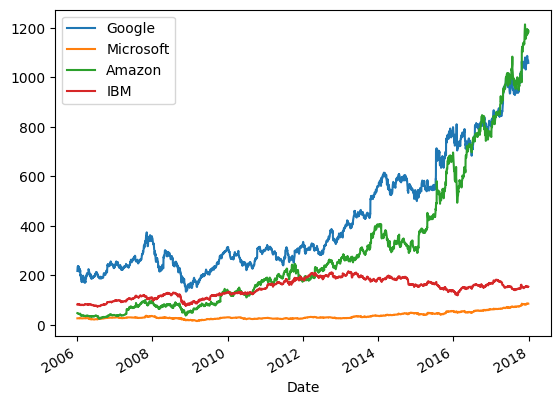

In [30]:
# Plotting before normalization
google.High.plot()
microsoft.High.plot()
amazon.High.plot()
ibm.High.plot()
plt.legend(['Google','Microsoft','Amazon','IBM'])
plt.show()

As we can see here Microsoft's "High" value is very slowly increasing straight line. IBM's "High" value and Amazon's "High" value started from the approx same stage, even Amazon's "High" value was a bit lower but after 2012 Amazon's "High" value started to exponentially increase and slight drop for IBM's "High" value. Since 2016 there is a high fight going between Google's "High" value and Amazon's "High" value at 2018 Amazon's "High" value also beat Google's "High" value.

In [31]:
# Normalizing and comparison
# Both stocks start from 100
'''normalized_google = google.High.div(google.High.iloc[0]).mul(100)
normalized_microsoft = microsoft.High.div(microsoft.High.iloc[0]).mul(100)
normalized_amazon = amazon.High.div(google.High.iloc[0]).mul(100)
normalized_ibm = ibm.High.div(microsoft.High.iloc[0]).mul(100)
normalized_google.plot()
normalized_microsoft.plot()
normalized_amazon.plot()
normalized_ibm.plot()
plt.legend(['Google','Microsoft','Amazon','IBM'])
plt.show()'''

"normalized_google = google.High.div(google.High.iloc[0]).mul(100)\nnormalized_microsoft = microsoft.High.div(microsoft.High.iloc[0]).mul(100)\nnormalized_amazon = amazon.High.div(google.High.iloc[0]).mul(100)\nnormalized_ibm = ibm.High.div(microsoft.High.iloc[0]).mul(100)\nnormalized_google.plot()\nnormalized_microsoft.plot()\nnormalized_amazon.plot()\nnormalized_ibm.plot()\nplt.legend(['Google','Microsoft','Amazon','IBM'])\nplt.show()"

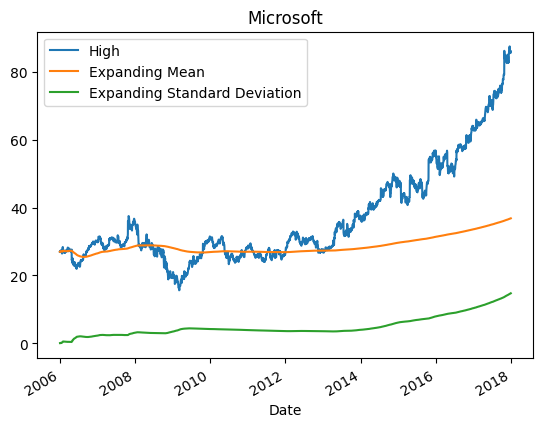

In [32]:
# Expanding window functions
microsoft_mean = microsoft.High.expanding().mean()
microsoft_std = microsoft.High.expanding().std()
microsoft.High.plot()
microsoft_mean.plot()
microsoft_std.plot()
plt.legend(['High','Expanding Mean','Expanding Standard Deviation'])
plt.title('Microsoft')
plt.show()

In Microsoft data, we can see in 2009 "High" value was under mean for a long time, so we can say there was some loss.

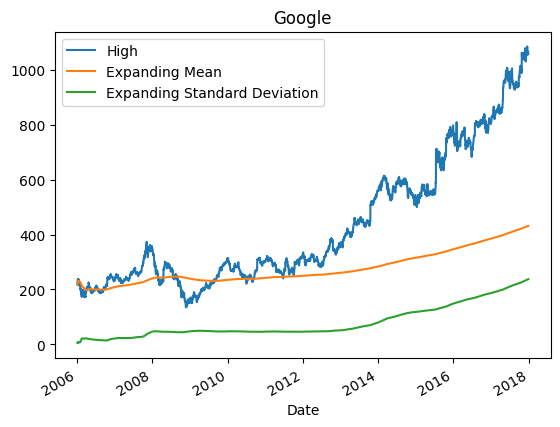

In [33]:
# Expanding window functions
google_mean = google.High.expanding().mean()
google_std = google.High.expanding().std()
google.High.plot()
google_mean.plot()
google_std.plot()
plt.legend(['High','Expanding Mean','Expanding Standard Deviation'])
plt.title('Google')
plt.show()

Same for Google data, we can see in 2009 "High" value was under mean for a long time, so we can say there was some loss. But it was not an as huge loss as Amazon.

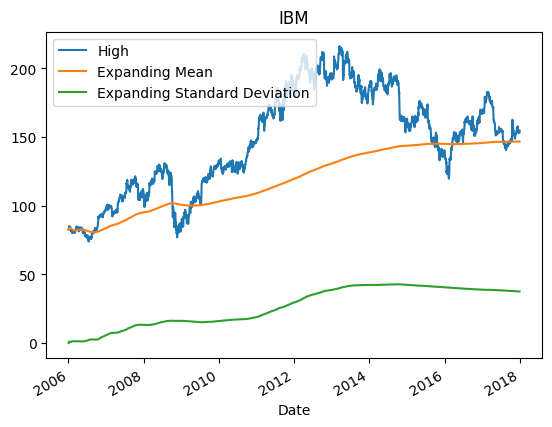

In [34]:
# Expanding window functions
ibm_mean = ibm.High.expanding().mean()
ibm_std = ibm.High.expanding().std()
ibm.High.plot()
ibm_mean.plot()
ibm_std.plot()
plt.legend(['High','Expanding Mean','Expanding Standard Deviation'])
plt.title('IBM')
plt.show()

Same for IBM data, we can see in 2009 "High" value was under mean for a long time, so we can say there was some loss. And after 2013 again a drop then in 2016 there was a huge loss but after that, they were doing well. After just some profit again in between 2017, there was another drop.

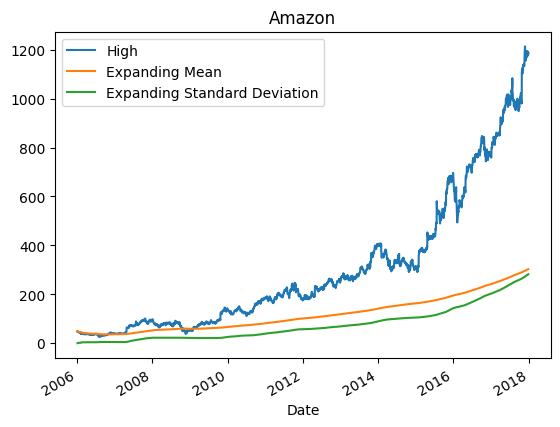

In [35]:
# Expanding window functions
amazon_mean = amazon.High.expanding().mean()
amazon_std = amazon.High.expanding().std()
amazon.High.plot()
amazon_mean.plot()
amazon_std.plot()
plt.legend(['High','Expanding Mean','Expanding Standard Deviation'])
plt.title('Amazon')
plt.show()

For Amazon's "High" value the case is different they also face loss in 2009 but for a very little margin. And after that their growth is in exponential order.

##Here we can see every company faced a loss in 2009, maybe that's because of the economic slowdown.

###Close

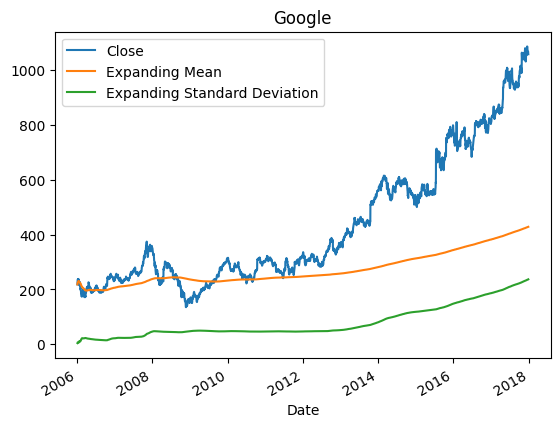

In [36]:
# Expanding window functions
google_mean = google.Close.expanding().mean()
google_std = google.Close.expanding().std()
google.High.plot()
google_mean.plot()
google_std.plot()
plt.legend(['Close','Expanding Mean','Expanding Standard Deviation'])
plt.title('Google')
plt.show()

In [37]:
from pylab import rcParams
import statsmodels.api as sm

##Trend and Seasonality

Google data

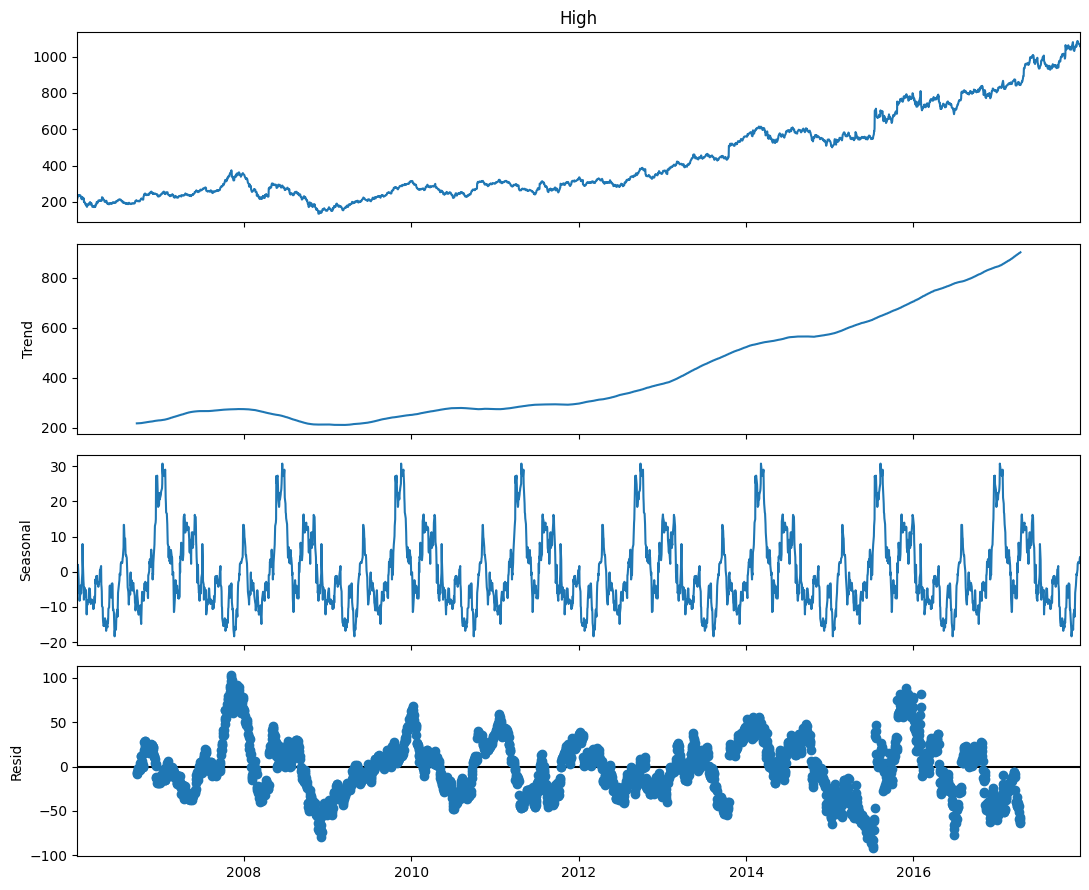

In [38]:
# Now, for decomposition...

rcParams['figure.figsize'] = 11, 9
decomposed_google_volume = sm.tsa.seasonal_decompose(google["High"], period=360)
 # The frequncy is annual
figure = decomposed_google_volume.plot()
plt.show()

There is a very slow increasing trend until 2012, but after 2012 there was an exponential high trend. And very high seasonality.

Microsoft data

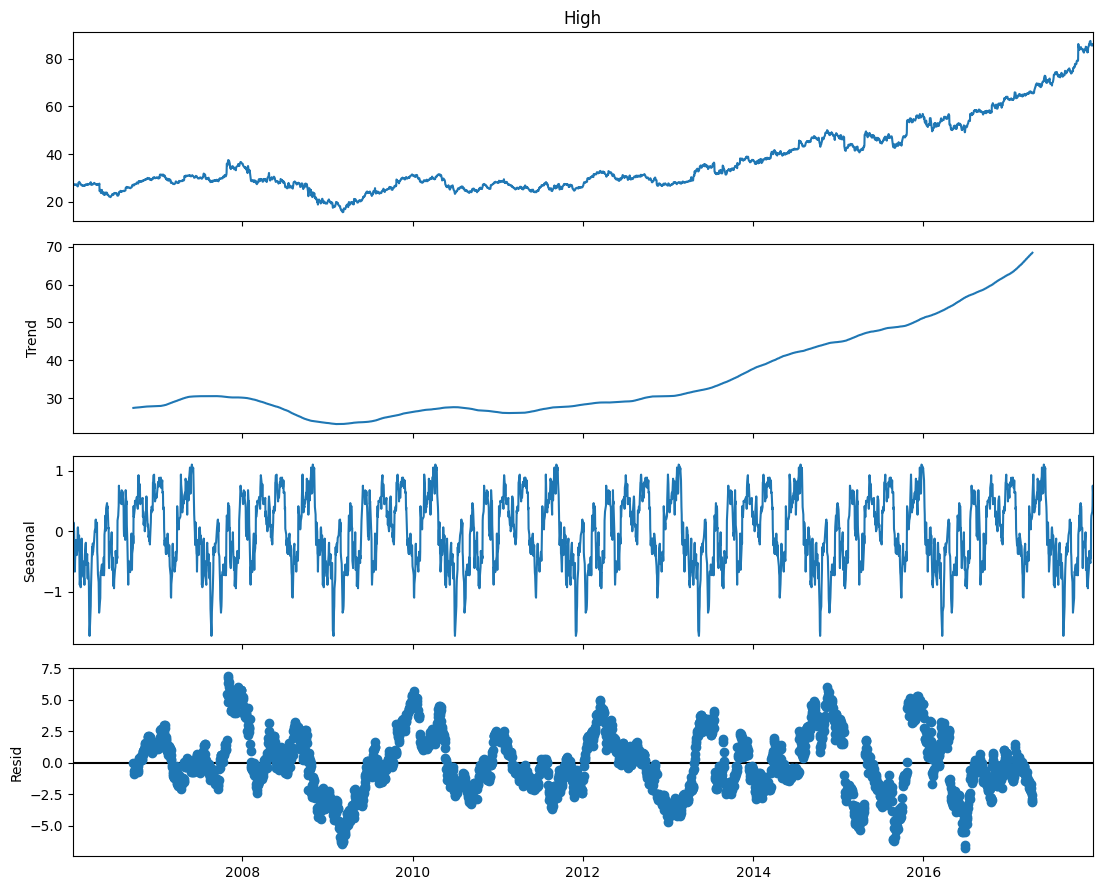

In [39]:
rcParams['figure.figsize'] = 11, 9
decomposed_microsoft_volume = sm.tsa.seasonal_decompose(microsoft["High"], period=360)
 # The frequncy is annual
figure = decomposed_microsoft_volume.plot()
plt.show()

Same for Microsoft data, there is a very slow increasing trend until 2012, but after 2012 there was an exponential high trend. And very high seasonality.

IBM data

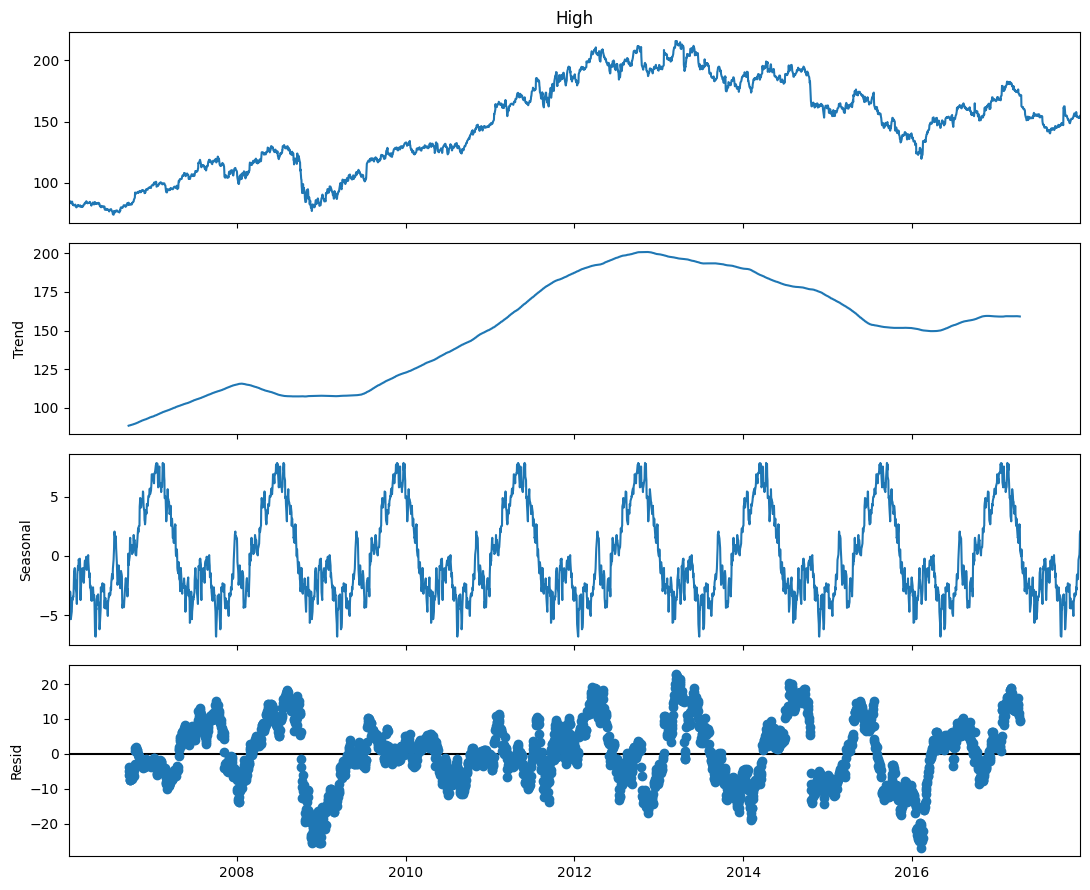

In [40]:
rcParams['figure.figsize'] = 11, 9
decomposed_ibm_volume = sm.tsa.seasonal_decompose(ibm["High"],period=360) # The frequncy is annual
figure = decomposed_ibm_volume.plot()
plt.show()

IBM data has a very slow increasing trend until 2008, but after 2009 there was an exponential high trend until 2013, then a high drop until 2016 then a very slow increasing trend. And very high seasonality.

Amazon data

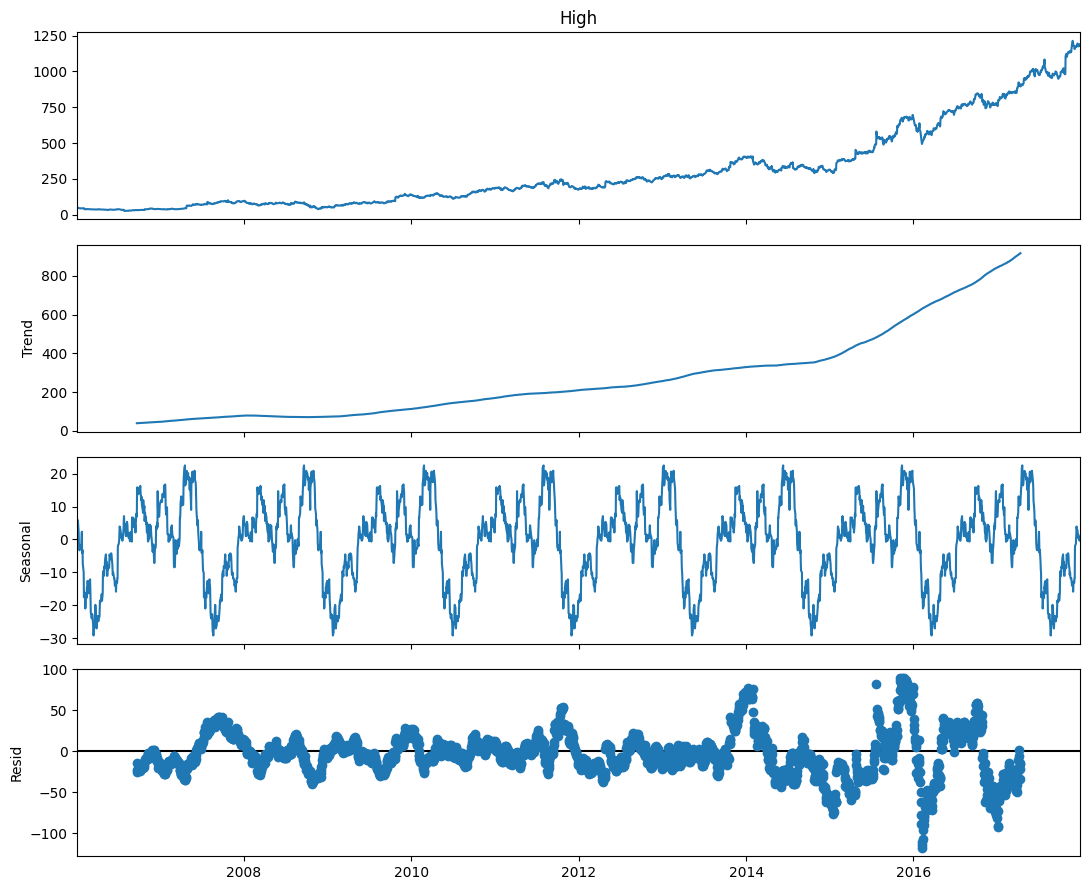

In [41]:
rcParams['figure.figsize'] = 11, 9
decomposed_amazon_volume = sm.tsa.seasonal_decompose(amazon["High"],period=360) # The frequncy is annual
figure = decomposed_amazon_volume.plot()
plt.show()

Amazon data is similar to Google data.

###Close

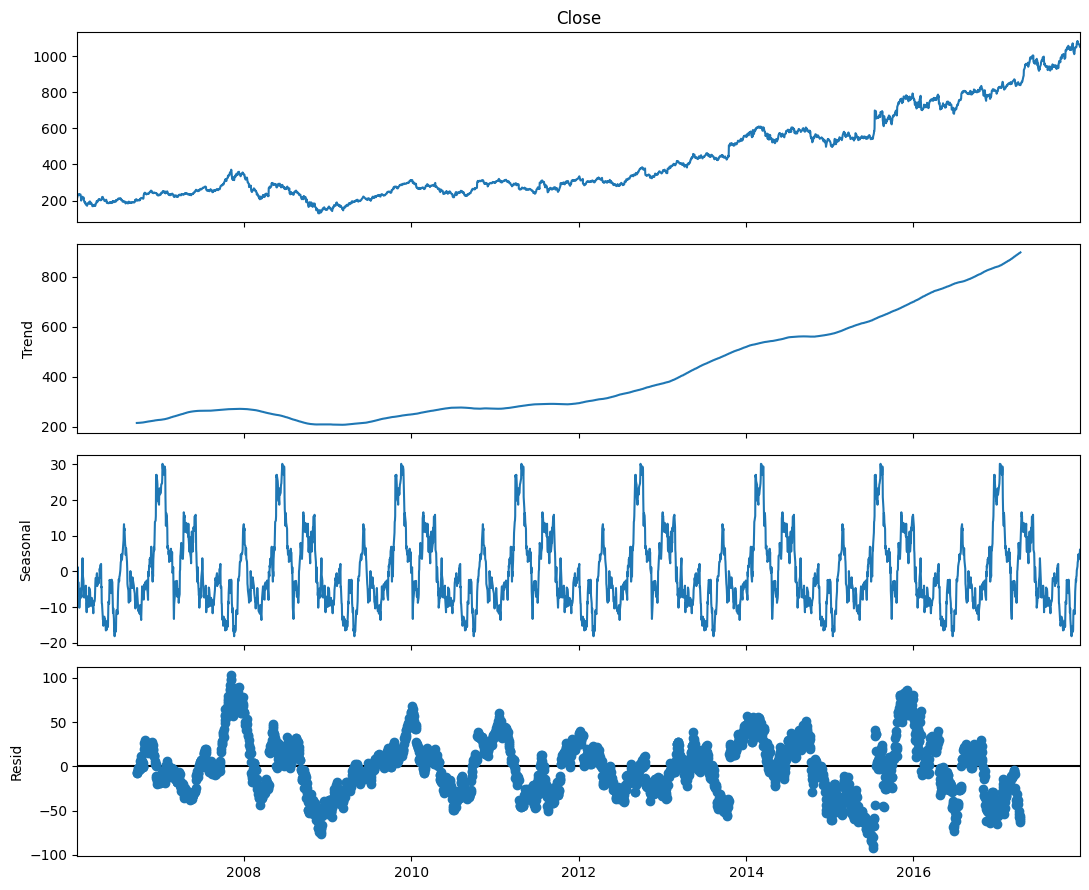

In [42]:
rcParams['figure.figsize'] = 11, 9
decomposed_google_volume = sm.tsa.seasonal_decompose(google["Close"],period=360) # The frequncy is annual
figure = decomposed_google_volume.plot()
plt.show()

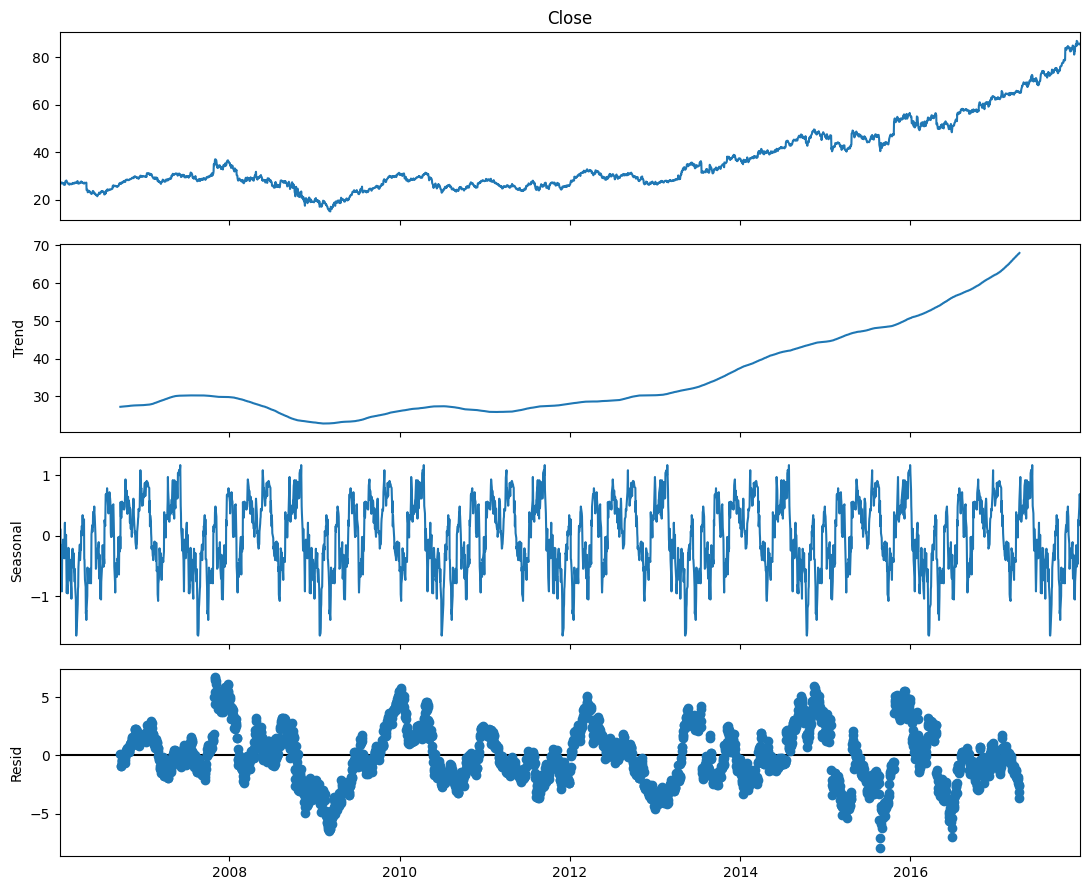

In [43]:
rcParams['figure.figsize'] = 11, 9
decomposed_microsoft_volume = sm.tsa.seasonal_decompose(microsoft["Close"],period=360) # The frequncy is annual
figure = decomposed_microsoft_volume.plot()
plt.show()

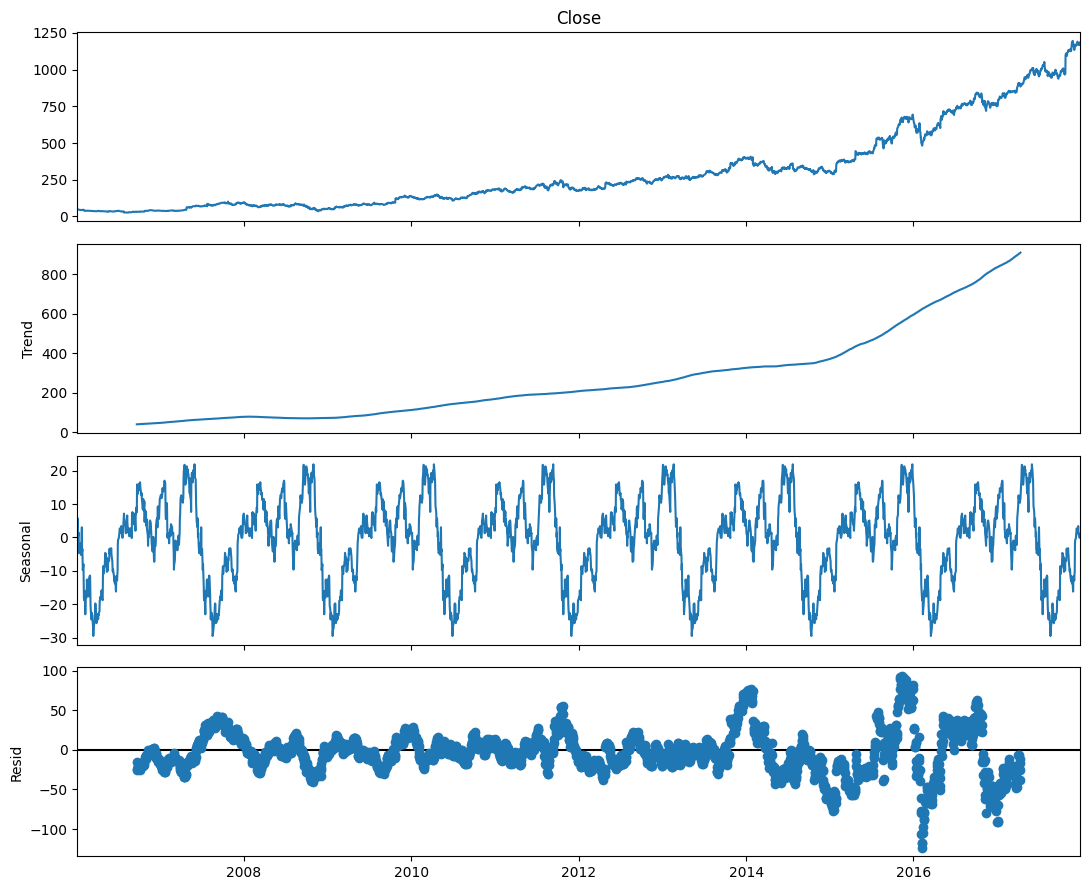

In [44]:
rcParams['figure.figsize'] = 11, 9
decomposed_amazon_volume = sm.tsa.seasonal_decompose(amazon["Close"],period=360) # The frequncy is annual
figure = decomposed_amazon_volume.plot()
plt.show()

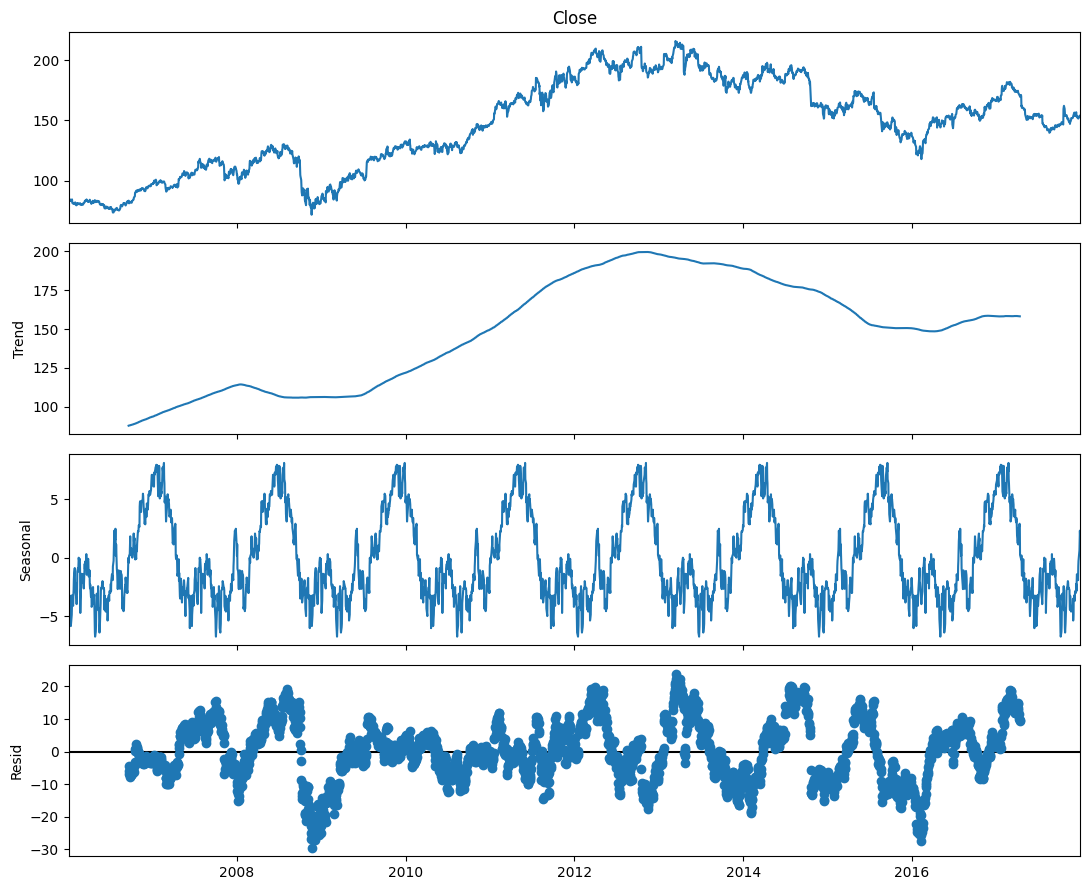

In [45]:
rcParams['figure.figsize'] = 11, 9
decomposed_ibm_volume = sm.tsa.seasonal_decompose(ibm["Close"],period=360) # The frequncy is annual
figure = decomposed_ibm_volume.plot()
plt.show()

Because there have a very strong correlation between Close and High, we can see the trend and seasonality is very similar.

#Prediction

##Time Series Forecasting:
Time series forecasting uses information regarding historical values and associated patterns to predict future activity. Most often, this relates to trend analysis, cyclical fluctuation analysis, and issues of seasonality. As with all forecasting methods, success is not guaranteed.


#GRU Model:
Gated recurrent unit  is essentially a simplified LSTM. It has
the exact same role in the network. The main difference is in the number of
gates and weights — GRU is somewhat simpler. It has 2 gates. Since it does
not have an output gate, there is no control over the memory content. The
update gate controls the information flow from the previous activation, and
the addition of new information as well, while the reset gate is inserted
into the candidate activation.



<img src='https://d2l.ai/_images/gru-1.svg' />


By using GRU time series forecasting we will forcaste and check.

In [46]:

filepath = 'AMZN_2006-01-01_to_2018-01-01.csv'
data_amazon = pd.read_csv(filepath)
data_amazon = data_amazon.sort_values('Date')
data_amazon.head()


,Date,Open,High,Low,Close,Volume,Name
0,2006-01-03,47.47,47.85,46.25,47.58,7582127,AMZN
1,2006-01-04,47.48,47.73,46.69,47.25,7440914,AMZN
2,2006-01-05,47.16,48.20,47.11,47.65,5417258,AMZN
3,2006-01-06,47.97,48.58,47.32,47.87,6154285,AMZN
4,2006-01-09,46.55,47.10,46.40,47.08,8945056,AMZN


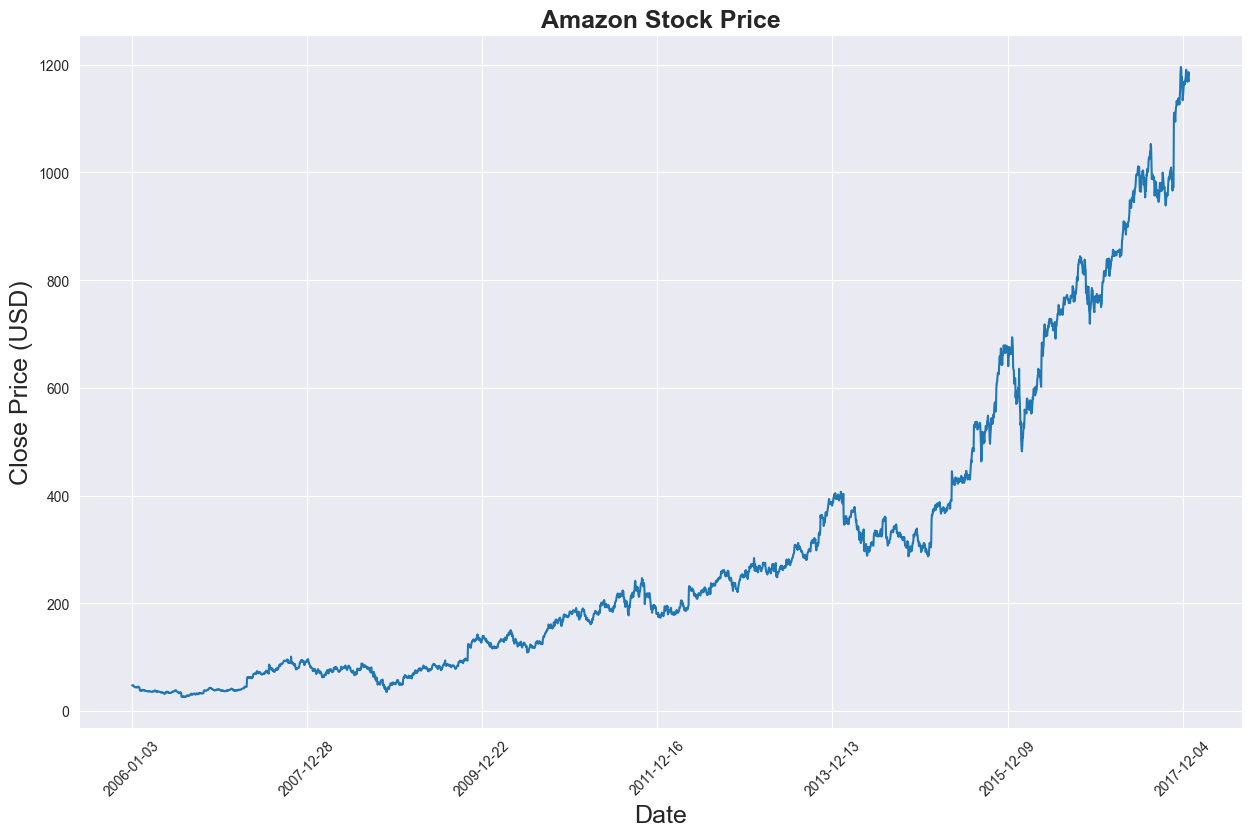

In [47]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("darkgrid")
plt.figure(figsize = (15,9))
plt.plot(data_amazon[['Close']])
plt.xticks(range(0,data_amazon.shape[0],500),data_amazon['Date'].loc[::500],rotation=45)
plt.title("Amazon Stock Price",fontsize=18, fontweight='bold')
plt.xlabel('Date',fontsize=18)
plt.ylabel('Close Price (USD)',fontsize=18)
plt.show()

In [48]:

filepath = 'GOOGL_2006-01-01_to_2018-01-01.csv'
data_google = pd.read_csv(filepath)
data_google = data_google.sort_values('Date')
data_google.head()

,Date,Open,High,Low,Close,Volume,Name
0,2006-01-03,211.47,218.05,209.32,217.83,13137450,GOOGL
1,2006-01-04,222.17,224.70,220.09,222.84,15292353,GOOGL
2,2006-01-05,223.22,226.00,220.97,225.85,10815661,GOOGL
3,2006-01-06,228.66,235.49,226.85,233.06,17759521,GOOGL
4,2006-01-09,233.44,236.94,230.70,233.68,12795837,GOOGL


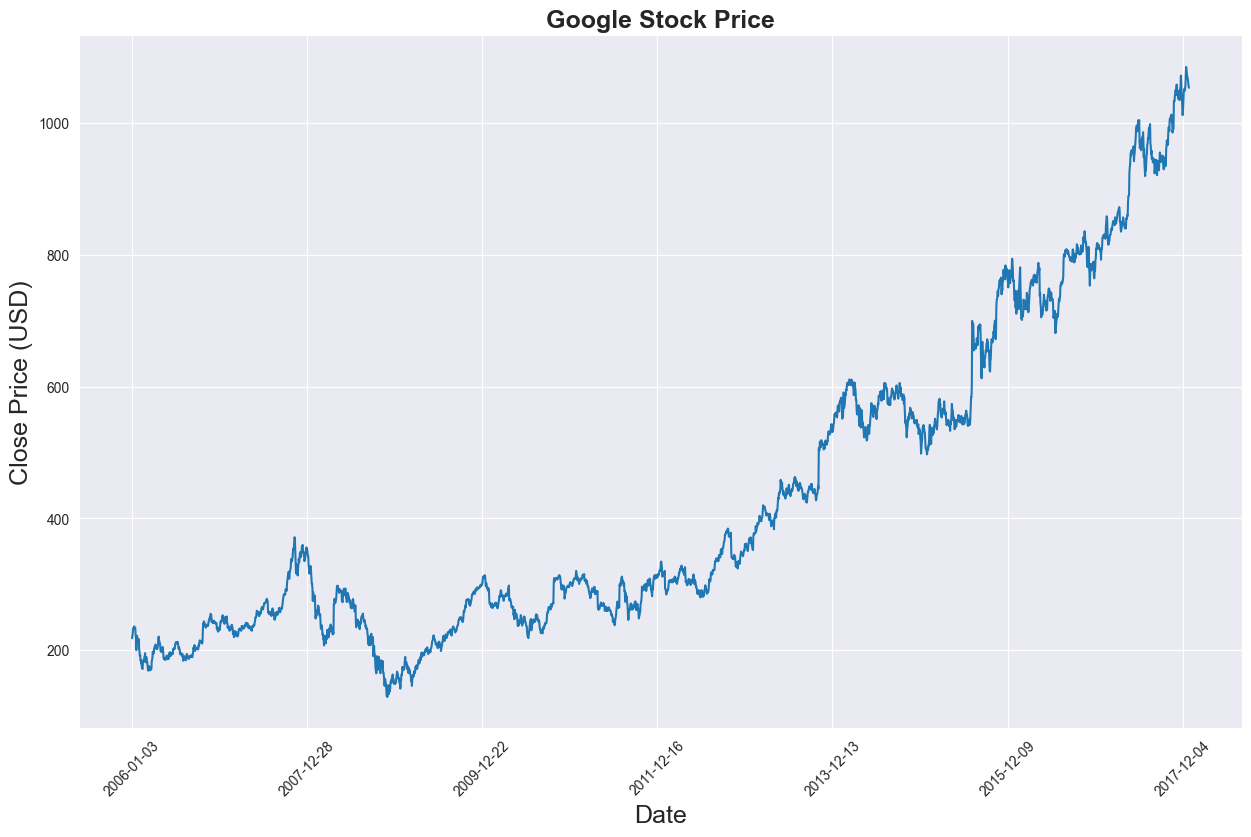

In [49]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("darkgrid")
plt.figure(figsize = (15,9))
plt.plot(data_google[['Close']])
plt.xticks(range(0,data_google.shape[0],500),data_google['Date'].loc[::500],rotation=45)
plt.title("Google Stock Price",fontsize=18, fontweight='bold')
plt.xlabel('Date',fontsize=18)
plt.ylabel('Close Price (USD)',fontsize=18)
plt.show()

In [50]:
filepath = 'IBM_2006-01-01_to_2018-01-01.csv'
data_ibm = pd.read_csv(filepath)
data_ibm = data_ibm.sort_values('Date')
data_ibm.head()

,Date,Open,High,Low,Close,Volume,Name
0,2006-01-03,82.45,82.55,80.81,82.06,11715200,IBM
1,2006-01-04,82.20,82.50,81.33,81.95,9840600,IBM
2,2006-01-05,81.40,82.90,81.00,82.50,7213500,IBM
3,2006-01-06,83.95,85.03,83.41,84.95,8197400,IBM
4,2006-01-09,84.10,84.25,83.38,83.73,6858200,IBM


In [51]:
data_ibm.dropna(inplace=True)

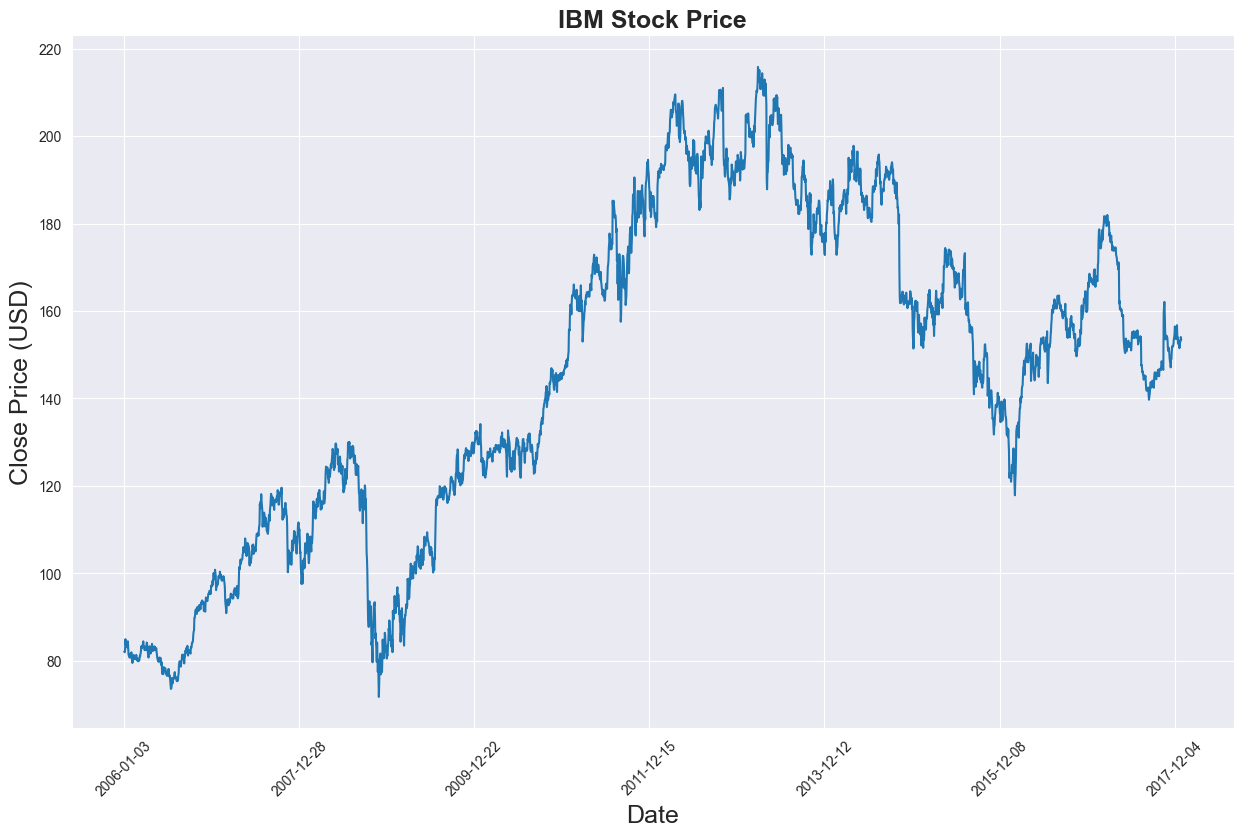

In [52]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("darkgrid")
plt.figure(figsize = (15,9))
plt.plot(data_ibm[['Close']])
plt.xticks(range(0,data_ibm.shape[0],500),data_ibm['Date'].loc[::500],rotation=45)
plt.title("IBM Stock Price",fontsize=18, fontweight='bold')
plt.xlabel('Date',fontsize=18)
plt.ylabel('Close Price (USD)',fontsize=18)
plt.show()

In [53]:
filepath = 'MSFT_2006-01-01_to_2018-01-01.csv'
data_microsoft = pd.read_csv(filepath)
data_microsoft = data_microsoft.sort_values('Date')
data_microsoft.head()

,Date,Open,High,Low,Close,Volume,Name
0,2006-01-03,26.25,27.00,26.10,26.84,79974418,MSFT
1,2006-01-04,26.77,27.08,26.77,26.97,57975661,MSFT
2,2006-01-05,26.96,27.13,26.91,26.99,48247610,MSFT
3,2006-01-06,26.89,27.00,26.49,26.91,100969092,MSFT
4,2006-01-09,26.93,27.07,26.76,26.86,55627836,MSFT


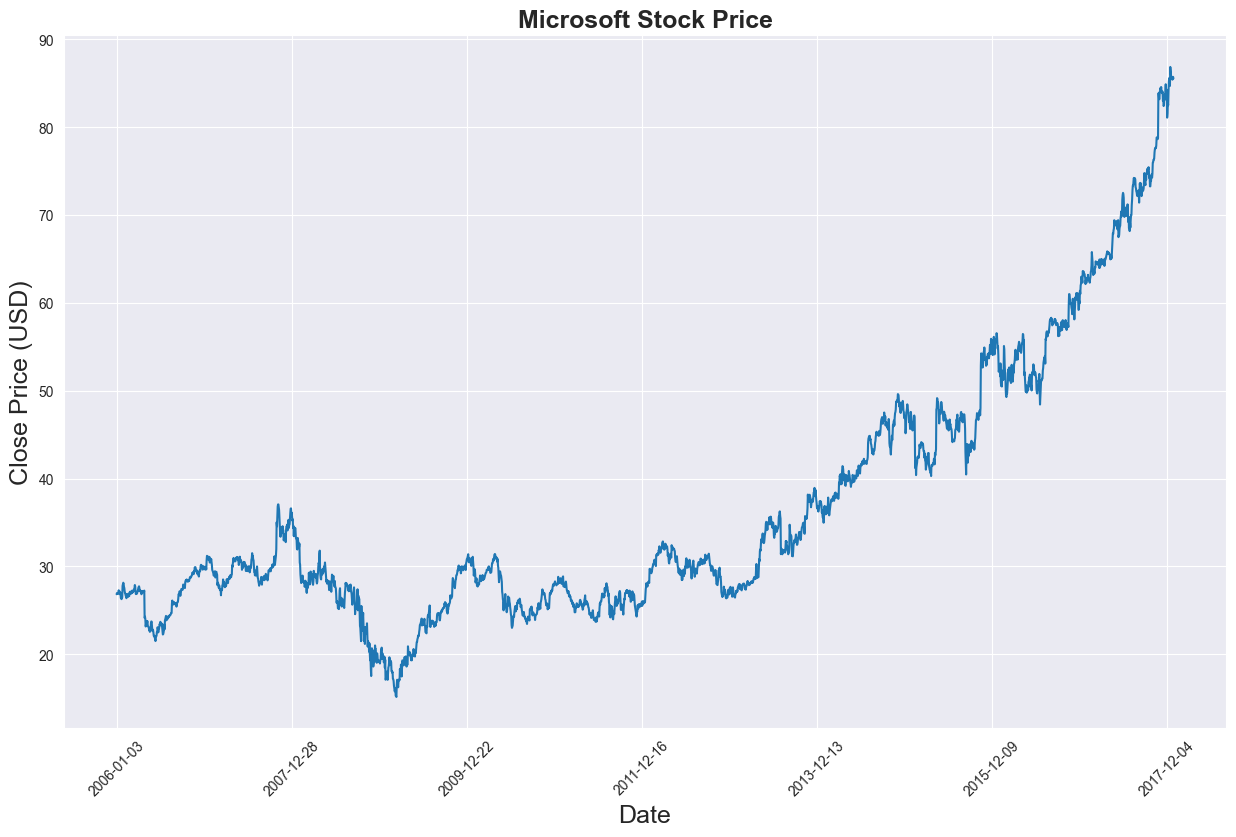

In [54]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("darkgrid")
plt.figure(figsize = (15,9))
plt.plot(data_microsoft[['Close']])
plt.xticks(range(0,data_microsoft.shape[0],500),data_microsoft['Date'].loc[::500],rotation=45)
plt.title("Microsoft Stock Price",fontsize=18, fontweight='bold')
plt.xlabel('Date',fontsize=18)
plt.ylabel('Close Price (USD)',fontsize=18)
plt.show()

In [55]:
price_amazon = data_amazon[['Close']]
price_amazon.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3019 entries, 0 to 3018
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Close   3019 non-null   float64
dtypes: float64(1)
memory usage: 23.7 KB


In [56]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(-1, 1))
price_amazon['Close'] = scaler.fit_transform(price_amazon['Close'].values.reshape(-1,1))

C:\Users\swast\AppData\Local\Temp\ipykernel_18164\3618325634.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [57]:

def split_data(stock, lookback):
    data_raw = stock.to_numpy() # convert to numpy array
    data = []
    
    # create all possible sequences of length seq_len
    for index in range(len(data_raw) - lookback): 
        data.append(data_raw[index: index + lookback])
    
    data = np.array(data);
    test_set_size = int(np.round(0.2*data.shape[0]));
    train_set_size = data.shape[0] - (test_set_size);
    
    x_train = data[:train_set_size,:-1,:]
    y_train = data[:train_set_size,-1,:]
    
    x_test = data[train_set_size:,:-1]
    y_test = data[train_set_size:,-1,:]
    
    return [x_train, y_train, x_test, y_test]

In [58]:

lookback = 20 # choose sequence length
x_train, y_train, x_test, y_test = split_data(price_amazon, lookback)
print('x_train.shape = ',x_train.shape)
print('y_train.shape = ',y_train.shape)
print('x_test.shape = ',x_test.shape)
print('y_test.shape = ',y_test.shape)

x_train.shape =  (2399, 19, 1)
y_train.shape =  (2399, 1)
x_test.shape =  (600, 19, 1)
y_test.shape =  (600, 1)


In [59]:
import torch
import torch.nn as nn

x_train = torch.from_numpy(x_train).type(torch.Tensor)
x_test = torch.from_numpy(x_test).type(torch.Tensor)
y_train_gru = torch.from_numpy(y_train).type(torch.Tensor)
y_test_gru = torch.from_numpy(y_test).type(torch.Tensor)

In [60]:
input_dim = 1
hidden_dim = 32
num_layers = 2
output_dim = 1
num_epochs = 105

In [61]:

class GRU(nn.Module):
    def __init__(self, input_dim, hidden_dim, num_layers, output_dim):
        super(GRU, self).__init__()
        self.hidden_dim = hidden_dim
        self.num_layers = num_layers
        
        self.gru = nn.GRU(input_dim, hidden_dim, num_layers, batch_first=True)
        self.fc = nn.Linear(hidden_dim, output_dim)

    def forward(self, x):
        h0 = torch.zeros(self.num_layers, x.size(0), self.hidden_dim).requires_grad_()
        out, (hn) = self.gru(x, (h0.detach()))
        out = self.fc(out[:, -1, :]) 
        return out

In [62]:
model = GRU(input_dim=input_dim, hidden_dim=hidden_dim, output_dim=output_dim, num_layers=num_layers)
criterion = torch.nn.MSELoss(reduction='mean')
optimiser = torch.optim.Adam(model.parameters(), lr=0.01)

In [63]:
import numpy as np
import torch
import torch.nn as nn
import time

hist = np.zeros(num_epochs)
start_time = time.time()
gru = []

for t in range(num_epochs):
    y_train_pred = model(x_train)

    loss = criterion(y_train_pred, y_train_gru)
    print("Epoch ", t, "MSE: ", loss.item())
    hist[t] = loss.item()

    optimiser.zero_grad()
    loss.backward()
    optimiser.step()

training_time = time.time()-start_time    
print("Training time: {}".format(training_time))

Epoch  0 MSE:  0.39504098892211914
Epoch  1 MSE:  0.10798602551221848
Epoch  2 MSE:  0.04654354229569435
Epoch  3 MSE:  0.09603173285722733
Epoch  4 MSE:  0.03815343603491783
Epoch  5 MSE:  0.030117379501461983
Epoch  6 MSE:  0.049607474356889725
Epoch  7 MSE:  0.056063778698444366
Epoch  8 MSE:  0.04602746665477753
Epoch  9 MSE:  0.030533766373991966
Epoch  10 MSE:  0.021614182740449905
Epoch  11 MSE:  0.024840541183948517
Epoch  12 MSE:  0.03269018232822418
Epoch  13 MSE:  0.032188188284635544
Epoch  14 MSE:  0.023586615920066833
Epoch  15 MSE:  0.016751745715737343
Epoch  16 MSE:  0.016598796471953392
Epoch  17 MSE:  0.02012402005493641
Epoch  18 MSE:  0.021877175197005272
Epoch  19 MSE:  0.01915409229695797
Epoch  20 MSE:  0.013591443188488483
Epoch  21 MSE:  0.00953291729092598
Epoch  22 MSE:  0.009987646713852882
Epoch  23 MSE:  0.012301827780902386
Epoch  24 MSE:  0.010754822753369808
Epoch  25 MSE:  0.005835613235831261
Epoch  26 MSE:  0.0033884660806506872
Epoch  27 MSE:  0.00

In [64]:
predict = pd.DataFrame(scaler.inverse_transform(y_train_pred.detach().numpy()))
original = pd.DataFrame(scaler.inverse_transform(y_train_gru.detach().numpy()))

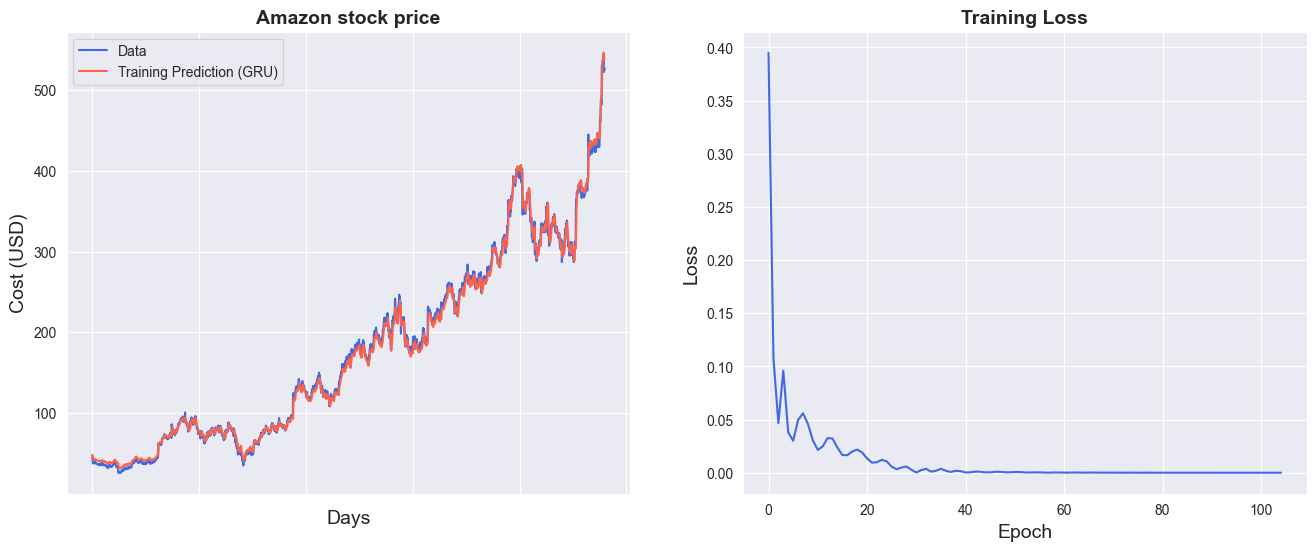

In [65]:
import seaborn as sns
sns.set_style("darkgrid")    

fig = plt.figure()
fig.subplots_adjust(hspace=0.2, wspace=0.2)

plt.subplot(1, 2, 1)
ax = sns.lineplot(x = original.index, y = original[0], label="Data", color='royalblue')
ax = sns.lineplot(x = predict.index, y = predict[0], label="Training Prediction (GRU)", color='tomato')
ax.set_title('Amazon stock price', size = 14, fontweight='bold')
ax.set_xlabel("Days", size = 14)
ax.set_ylabel("Cost (USD)", size = 14)
ax.set_xticklabels('', size=10)


plt.subplot(1, 2, 2)
ax = sns.lineplot(data=hist, color='royalblue')
ax.set_xlabel("Epoch", size = 14)
ax.set_ylabel("Loss", size = 14)
ax.set_title("Training Loss", size = 14, fontweight='bold')
fig.set_figheight(6)
fig.set_figwidth(16)

In [66]:
import math, time
from sklearn.metrics import mean_squared_error

# make predictions
y_test_pred = model(x_test)

# invert predictions
y_train_pred = scaler.inverse_transform(y_train_pred.detach().numpy())
y_train = scaler.inverse_transform(y_train_gru.detach().numpy())
y_test_pred = scaler.inverse_transform(y_test_pred.detach().numpy())
y_test = scaler.inverse_transform(y_test_gru.detach().numpy())

# calculate root mean squared error
trainScore = math.sqrt(mean_squared_error(y_train[:,0], y_train_pred[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(y_test[:,0], y_test_pred[:,0]))
print('Test Score: %.2f RMSE' % (testScore))
gru.append(trainScore)
gru.append(testScore)
gru.append(training_time)

Train Score: 6.18 RMSE
Test Score: 33.82 RMSE


In [67]:
# shift train predictions for plotting
trainPredictPlot = np.empty_like(price_amazon)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[lookback:len(y_train_pred)+lookback, :] = y_train_pred

# shift test predictions for plotting
testPredictPlot = np.empty_like(price_amazon)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(y_train_pred)+lookback-1:len(price_amazon)-1, :] = y_test_pred

original = scaler.inverse_transform(price_amazon['Close'].values.reshape(-1,1))

predictions = np.append(trainPredictPlot, testPredictPlot, axis=1)
predictions = np.append(predictions, original, axis=1)
result = pd.DataFrame(predictions)

In [68]:
import plotly.express as px
import plotly.graph_objects as go

fig = go.Figure()

fig.add_trace(go.Scatter(x=result.index, y=result[0],
                         mode='lines',
                         name='Train prediction'))
fig.add_trace(go.Scatter(x=result.index, y=result[1],
                         mode='lines',
                         name='Test prediction'))
fig.add_trace(go.Scatter(x=result.index, y=result[2],
                         mode='lines',
                         name='Actual Value'))


fig.update_layout(
    xaxis=dict(
        showline=True,
        showgrid=True,
        showticklabels=False,
        linecolor='white',
        linewidth=2
    ),
    yaxis=dict(
        title=dict(
            text='Close (USD)',
            font=dict(
                family='Rockwell',
                size=12,
                color='white'
            )
        ),
        showline=True,
        showgrid=True,
        showticklabels=True,
        linecolor='white',
        linewidth=2,
        ticks='outside',
        tickfont=dict(
            family='Rockwell',
            size=12,
            color='white',
        ),
    ),
    showlegend=True,
    template='plotly_dark'
)

# Title annotation
annotations = []
annotations.append(dict(xref='paper', yref='paper', x=0.0, y=1.05,
                        xanchor='left', yanchor='bottom',
                        text='Amazon Stock Prediction',
                        font=dict(family='Rockwell',
                                  size=26,
                                  color='white'),
                        showarrow=False))
fig.update_layout(annotations=annotations)

fig.show()


In [69]:
import yfinance as yf
import pandas as pd

# Download Amazon stock data
data = yf.download("AMZN", start="2015-01-01", end="2025-01-01")

price_google = data[['Close']]
price_google.info()


C:\Users\swast\AppData\Local\Temp\ipykernel_18164\3663426104.py:5: FutureWarning:

YF.download() has changed argument auto_adjust default to True

[*********************100%***********************]  1 of 1 completed

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2516 entries, 2015-01-02 to 2024-12-31
Data columns (total 1 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   (Close, AMZN)  2516 non-null   float64
dtypes: float64(1)
memory usage: 39.3 KB


In [70]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(-1, 1))
price_google['Close'] = scaler.fit_transform(price_google['Close'].values.reshape(-1,1))

C:\Users\swast\AppData\Local\Temp\ipykernel_18164\2495479181.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [71]:

lookback = 20 # choose sequence length
x_train, y_train, x_test, y_test = split_data(price_google, lookback)
print('x_train.shape = ',x_train.shape)
print('y_train.shape = ',y_train.shape)
print('x_test.shape = ',x_test.shape)
print('y_test.shape = ',y_test.shape)

x_train.shape =  (1997, 19, 1)
y_train.shape =  (1997, 1)
x_test.shape =  (499, 19, 1)
y_test.shape =  (499, 1)


In [72]:

import torch
import torch.nn as nn

x_train = torch.from_numpy(x_train).type(torch.Tensor)
x_test = torch.from_numpy(x_test).type(torch.Tensor)
y_train_lstm = torch.from_numpy(y_train).type(torch.Tensor)
y_test_lstm = torch.from_numpy(y_test).type(torch.Tensor)
y_train_gru = torch.from_numpy(y_train).type(torch.Tensor)
y_test_gru = torch.from_numpy(y_test).type(torch.Tensor)

In [73]:
model = GRU(input_dim=input_dim, hidden_dim=hidden_dim, output_dim=output_dim, num_layers=num_layers)
criterion = torch.nn.MSELoss(reduction='mean')
optimiser = torch.optim.Adam(model.parameters(), lr=0.01)

In [74]:
hist = np.zeros(num_epochs)
start_time = time.time()
gru = []

for t in range(num_epochs):
    y_train_pred = model(x_train)

    loss = criterion(y_train_pred, y_train_gru)
    print("Epoch ", t, "MSE: ", loss.item())
    hist[t] = loss.item()

    optimiser.zero_grad()
    loss.backward()
    optimiser.step()

training_time = time.time()-start_time    
print("Training time: {}".format(training_time))

Epoch  0 MSE:  0.21257971227169037
Epoch  1 MSE:  0.15313906967639923
Epoch  2 MSE:  0.12369967997074127
Epoch  3 MSE:  0.06967069208621979
Epoch  4 MSE:  0.027759669348597527
Epoch  5 MSE:  0.005881109274923801
Epoch  6 MSE:  0.06717678904533386
Epoch  7 MSE:  0.027837315574288368
Epoch  8 MSE:  0.017441704869270325
Epoch  9 MSE:  0.009300843812525272
Epoch  10 MSE:  0.00794165674597025
Epoch  11 MSE:  0.015683261677622795
Epoch  12 MSE:  0.02218819409608841
Epoch  13 MSE:  0.02048361860215664
Epoch  14 MSE:  0.014473149552941322
Epoch  15 MSE:  0.009447685442864895
Epoch  16 MSE:  0.006233434192836285
Epoch  17 MSE:  0.0035683289170265198
Epoch  18 MSE:  0.0020167245529592037
Epoch  19 MSE:  0.003897043177857995
Epoch  20 MSE:  0.00792130921036005
Epoch  21 MSE:  0.008704065345227718
Epoch  22 MSE:  0.0059425849467515945
Epoch  23 MSE:  0.003559652017429471
Epoch  24 MSE:  0.0026160753332078457
Epoch  25 MSE:  0.002061273204162717
Epoch  26 MSE:  0.001748909242451191
Epoch  27 MSE:  

In [75]:

predict = pd.DataFrame(scaler.inverse_transform(y_train_pred.detach().numpy()))
original = pd.DataFrame(scaler.inverse_transform(y_train_gru.detach().numpy()))

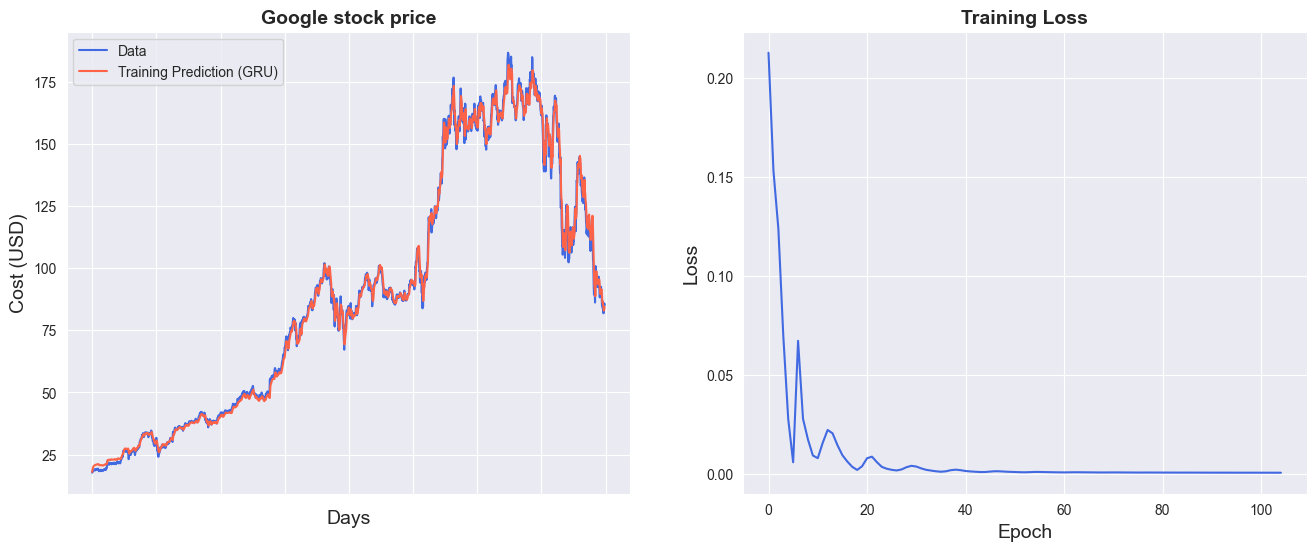

In [76]:
import seaborn as sns
sns.set_style("darkgrid")    

fig = plt.figure()
fig.subplots_adjust(hspace=0.2, wspace=0.2)

plt.subplot(1, 2, 1)
ax = sns.lineplot(x = original.index, y = original[0], label="Data", color='royalblue')
ax = sns.lineplot(x = predict.index, y = predict[0], label="Training Prediction (GRU)", color='tomato')
ax.set_title('Google stock price', size = 14, fontweight='bold')
ax.set_xlabel("Days", size = 14)
ax.set_ylabel("Cost (USD)", size = 14)
ax.set_xticklabels('', size=10)


plt.subplot(1, 2, 2)
ax = sns.lineplot(data=hist, color='royalblue')
ax.set_xlabel("Epoch", size = 14)
ax.set_ylabel("Loss", size = 14)
ax.set_title("Training Loss", size = 14, fontweight='bold')
fig.set_figheight(6)
fig.set_figwidth(16)

In [77]:
import math, time
from sklearn.metrics import mean_squared_error

# make predictions
y_test_pred = model(x_test)

# invert predictions
y_train_pred = scaler.inverse_transform(y_train_pred.detach().numpy())
y_train = scaler.inverse_transform(y_train_gru.detach().numpy())
y_test_pred = scaler.inverse_transform(y_test_pred.detach().numpy())
y_test = scaler.inverse_transform(y_test_gru.detach().numpy())

# calculate root mean squared error
trainScore = math.sqrt(mean_squared_error(y_train[:,0], y_train_pred[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(y_test[:,0], y_test_pred[:,0]))
print('Test Score: %.2f RMSE' % (testScore))
gru.append(trainScore)
gru.append(testScore)
gru.append(training_time)

Train Score: 2.69 RMSE
Test Score: 5.42 RMSE


In [78]:

# shift train predictions for plotting
trainPredictPlot = np.empty_like(price_google)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[lookback:len(y_train_pred)+lookback, :] = y_train_pred

# shift test predictions for plotting
testPredictPlot = np.empty_like(price_google)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(y_train_pred)+lookback-1:len(price_google)-1, :] = y_test_pred

original = scaler.inverse_transform(price_google['Close'].values.reshape(-1,1))

predictions = np.append(trainPredictPlot, testPredictPlot, axis=1)
predictions = np.append(predictions, original, axis=1)
result = pd.DataFrame(predictions)

In [79]:
import plotly.graph_objects as go

# Create the figure
fig = go.Figure()

# Add traces
fig.add_trace(go.Scatter(x=result.index, y=result[0],
                         mode='lines',
                         name='Train prediction'))
fig.add_trace(go.Scatter(x=result.index, y=result[1],
                         mode='lines',
                         name='Test prediction'))
fig.add_trace(go.Scatter(x=result.index, y=result[2],
                         mode='lines',
                         name='Actual Value'))

# Update layout
fig.update_layout(
    xaxis=dict(
        showline=True,
        showgrid=True,
        showticklabels=False,
        linecolor='white',
        linewidth=2
    ),
    yaxis=dict(
        title=dict(
            text='Close (USD)',
            font=dict(
                family='Rockwell',
                size=12,
                color='white'
            )
        ),
        showline=True,
        showgrid=True,
        showticklabels=True,
        linecolor='white',
        linewidth=2,
        ticks='outside',
        tickfont=dict(
            family='Rockwell',
            size=12,
            color='white'
        ),
    ),
    showlegend=True,
    template='plotly_dark'
)

# Add title annotation
annotations = []
annotations.append(dict(xref='paper', yref='paper', x=0.0, y=1.05,
                        xanchor='left', yanchor='bottom',
                        text='Amazon Stock Prediction',
                        font=dict(family='Rockwell',
                                  size=26,
                                  color='white'),
                        showarrow=False))
fig.update_layout(annotations=annotations)

# Show figure
fig.show()


In [80]:

price_ibm = data_ibm[['Close']]
price_ibm.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3019 entries, 0 to 3019
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Close   3019 non-null   float64
dtypes: float64(1)
memory usage: 47.2 KB


In [81]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(-1, 1))
price_ibm['Close'] = scaler.fit_transform(price_ibm['Close'].values.reshape(-1,1))

C:\Users\swast\AppData\Local\Temp\ipykernel_18164\1961387485.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [82]:
lookback = 20 # choose sequence length
x_train, y_train, x_test, y_test = split_data(price_ibm, lookback)
print('x_train.shape = ',x_train.shape)
print('y_train.shape = ',y_train.shape)
print('x_test.shape = ',x_test.shape)
print('y_test.shape = ',y_test.shape)

x_train.shape =  (2399, 19, 1)
y_train.shape =  (2399, 1)
x_test.shape =  (600, 19, 1)
y_test.shape =  (600, 1)


In [83]:

import torch
import torch.nn as nn

x_train = torch.from_numpy(x_train).type(torch.Tensor)
x_test = torch.from_numpy(x_test).type(torch.Tensor)
y_train_gru = torch.from_numpy(y_train).type(torch.Tensor)
y_test_gru = torch.from_numpy(y_test).type(torch.Tensor)

In [84]:
input_dim = 1
hidden_dim = 32
num_layers = 2
output_dim = 1
num_epochs = 105

In [85]:

model = GRU(input_dim=input_dim, hidden_dim=hidden_dim, output_dim=output_dim, num_layers=num_layers)
criterion = torch.nn.MSELoss(reduction='mean')
optimiser = torch.optim.Adam(model.parameters(), lr=0.01)

In [86]:
hist = np.zeros(num_epochs)
start_time = time.time()
gru = []

for t in range(num_epochs):
    y_train_pred = model(x_train)

    loss = criterion(y_train_pred, y_train_gru)
    print("Epoch ", t, "MSE: ", loss.item())
    hist[t] = loss.item()

    optimiser.zero_grad()
    loss.backward()
    optimiser.step()

training_time = time.time()-start_time    
print("Training time: {}".format(training_time))

Epoch  0 MSE:  0.3348468840122223
Epoch  1 MSE:  0.22031144797801971
Epoch  2 MSE:  0.11834892630577087
Epoch  3 MSE:  0.014641392976045609
Epoch  4 MSE:  0.09822331368923187
Epoch  5 MSE:  0.03618109971284866
Epoch  6 MSE:  0.0025334684178233147
Epoch  7 MSE:  0.01845971681177616
Epoch  8 MSE:  0.03626039996743202
Epoch  9 MSE:  0.039285290986299515
Epoch  10 MSE:  0.029472967609763145
Epoch  11 MSE:  0.0146604860201478
Epoch  12 MSE:  0.0036207460798323154
Epoch  13 MSE:  0.0028045037761330605
Epoch  14 MSE:  0.010793041437864304
Epoch  15 MSE:  0.01736730895936489
Epoch  16 MSE:  0.015713512897491455
Epoch  17 MSE:  0.008726206608116627
Epoch  18 MSE:  0.002873342717066407
Epoch  19 MSE:  0.0018003418808802962
Epoch  20 MSE:  0.0043218694627285
Epoch  21 MSE:  0.007282179314643145
Epoch  22 MSE:  0.008746716193854809
Epoch  23 MSE:  0.00813638512045145
Epoch  24 MSE:  0.005788940470665693
Epoch  25 MSE:  0.003062010509893298
Epoch  26 MSE:  0.0015712279127910733
Epoch  27 MSE:  0.00

In [87]:
predict = pd.DataFrame(scaler.inverse_transform(y_train_pred.detach().numpy()))
original = pd.DataFrame(scaler.inverse_transform(y_train_gru.detach().numpy()))

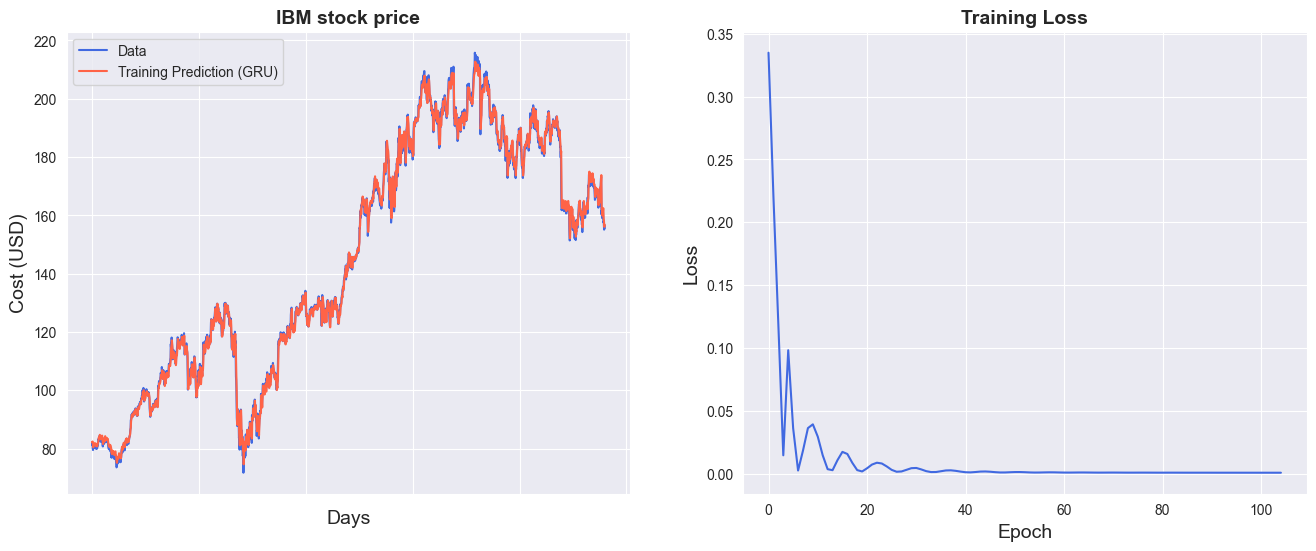

In [88]:
import seaborn as sns
sns.set_style("darkgrid")    

fig = plt.figure()
fig.subplots_adjust(hspace=0.2, wspace=0.2)

plt.subplot(1, 2, 1)
ax = sns.lineplot(x = original.index, y = original[0], label="Data", color='royalblue')
ax = sns.lineplot(x = predict.index, y = predict[0], label="Training Prediction (GRU)", color='tomato')
ax.set_title('IBM stock price', size = 14, fontweight='bold')
ax.set_xlabel("Days", size = 14)
ax.set_ylabel("Cost (USD)", size = 14)
ax.set_xticklabels('', size=10)


plt.subplot(1, 2, 2)
ax = sns.lineplot(data=hist, color='royalblue')
ax.set_xlabel("Epoch", size = 14)
ax.set_ylabel("Loss", size = 14)
ax.set_title("Training Loss", size = 14, fontweight='bold')
fig.set_figheight(6)
fig.set_figwidth(16)

In [89]:
import math, time
from sklearn.metrics import mean_squared_error

# make predictions
y_test_pred = model(x_test)

# invert predictions
y_train_pred = scaler.inverse_transform(y_train_pred.detach().numpy())
y_train = scaler.inverse_transform(y_train_gru.detach().numpy())
y_test_pred = scaler.inverse_transform(y_test_pred.detach().numpy())
y_test = scaler.inverse_transform(y_test_gru.detach().numpy())

# calculate root mean squared error
trainScore = math.sqrt(mean_squared_error(y_train[:,0], y_train_pred[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(y_test[:,0], y_test_pred[:,0]))
print('Test Score: %.2f RMSE' % (testScore))
gru.append(trainScore)
gru.append(testScore)
gru.append(training_time)

Train Score: 2.03 RMSE
Test Score: 1.96 RMSE


In [90]:
# shift train predictions for plotting
trainPredictPlot = np.empty_like(price_ibm)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[lookback:len(y_train_pred)+lookback, :] = y_train_pred

# shift test predictions for plotting
testPredictPlot = np.empty_like(price_ibm)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(y_train_pred)+lookback-1:len(price_ibm)-1, :] = y_test_pred

original = scaler.inverse_transform(price_ibm['Close'].values.reshape(-1,1))

predictions = np.append(trainPredictPlot, testPredictPlot, axis=1)
predictions = np.append(predictions, original, axis=1)
result = pd.DataFrame(predictions)

In [91]:
import plotly.graph_objects as go

# Create figure
fig = go.Figure()

# Add traces
fig.add_trace(go.Scatter(x=result.index, y=result[0],
                         mode='lines',
                         name='Train prediction'))
fig.add_trace(go.Scatter(x=result.index, y=result[1],
                         mode='lines',
                         name='Test prediction'))
fig.add_trace(go.Scatter(x=result.index, y=result[2],
                         mode='lines',
                         name='Actual Value'))

# Update layout
fig.update_layout(
    xaxis=dict(
        showline=True,
        showgrid=True,
        showticklabels=False,
        linecolor='white',
        linewidth=2
    ),
    yaxis=dict(
        title=dict(
            text='Close (USD)',
            font=dict(
                family='Rockwell',
                size=12,
                color='white'
            )
        ),
        showline=True,
        showgrid=True,
        showticklabels=True,
        linecolor='white',
        linewidth=2,
        ticks='outside',
        tickfont=dict(
            family='Rockwell',
            size=12,
            color='white'
        ),
    ),
    showlegend=True,
    template='plotly_dark'
)

# Add title annotation
annotations = [
    dict(xref='paper', yref='paper', x=0.0, y=1.05,
         xanchor='left', yanchor='bottom',
         text='IBM Stock Prediction',
         font=dict(family='Rockwell',
                   size=26,
                   color='white'),
         showarrow=False)
]
fig.update_layout(annotations=annotations)

# Show plot
fig.show()


In [92]:
price_microsoft = data_microsoft[['Close']]
price_microsoft.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3019 entries, 0 to 3018
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Close   3019 non-null   float64
dtypes: float64(1)
memory usage: 23.7 KB


In [93]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(-1, 1))
price_microsoft['Close'] = scaler.fit_transform(price_microsoft['Close'].values.reshape(-1,1))

C:\Users\swast\AppData\Local\Temp\ipykernel_18164\3197294828.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [94]:

lookback = 20 # choose sequence length
x_train, y_train, x_test, y_test = split_data(price_microsoft, lookback)
print('x_train.shape = ',x_train.shape)
print('y_train.shape = ',y_train.shape)
print('x_test.shape = ',x_test.shape)
print('y_test.shape = ',y_test.shape)

x_train.shape =  (2399, 19, 1)
y_train.shape =  (2399, 1)
x_test.shape =  (600, 19, 1)
y_test.shape =  (600, 1)


In [95]:
import torch
import torch.nn as nn

x_train = torch.from_numpy(x_train).type(torch.Tensor)
x_test = torch.from_numpy(x_test).type(torch.Tensor)
y_train_gru = torch.from_numpy(y_train).type(torch.Tensor)
y_test_gru = torch.from_numpy(y_test).type(torch.Tensor)


In [96]:
input_dim = 1
hidden_dim = 32
num_layers = 2
output_dim = 1
num_epochs = 105

In [97]:
model = GRU(input_dim=input_dim, hidden_dim=hidden_dim, output_dim=output_dim, num_layers=num_layers)
criterion = torch.nn.MSELoss(reduction='mean')
optimiser = torch.optim.Adam(model.parameters(), lr=0.01)

In [98]:

hist = np.zeros(num_epochs)
start_time = time.time()
gru = []

for t in range(num_epochs):
    y_train_pred = model(x_train)

    loss = criterion(y_train_pred, y_train_gru)
    print("Epoch ", t, "MSE: ", loss.item())
    hist[t] = loss.item()

    optimiser.zero_grad()
    loss.backward()
    optimiser.step()

training_time = time.time()-start_time    
print("Training time: {}".format(training_time))

Epoch  0 MSE:  0.18782936036586761
Epoch  1 MSE:  0.030917610973119736
Epoch  2 MSE:  0.1188836470246315
Epoch  3 MSE:  0.051665566861629486
Epoch  4 MSE:  0.02748030051589012
Epoch  5 MSE:  0.04049346223473549
Epoch  6 MSE:  0.053111784160137177
Epoch  7 MSE:  0.05413652956485748
Epoch  8 MSE:  0.046547237783670425
Epoch  9 MSE:  0.035854075103998184
Epoch  10 MSE:  0.026784835383296013
Epoch  11 MSE:  0.02261808142066002
Epoch  12 MSE:  0.02421392686665058
Epoch  13 MSE:  0.028350137174129486
Epoch  14 MSE:  0.029132068157196045
Epoch  15 MSE:  0.024497034028172493
Epoch  16 MSE:  0.018115270882844925
Epoch  17 MSE:  0.014280954375863075
Epoch  18 MSE:  0.014008435420691967
Epoch  19 MSE:  0.015161261893808842
Epoch  20 MSE:  0.01455970574170351
Epoch  21 MSE:  0.0104813352227211
Epoch  22 MSE:  0.004642714746296406
Epoch  23 MSE:  0.002177009591832757
Epoch  24 MSE:  0.005579173099249601
Epoch  25 MSE:  0.005755671299993992
Epoch  26 MSE:  0.00199482636526227
Epoch  27 MSE:  0.00443

In [99]:
predict = pd.DataFrame(scaler.inverse_transform(y_train_pred.detach().numpy()))
original = pd.DataFrame(scaler.inverse_transform(y_train_gru.detach().numpy()))

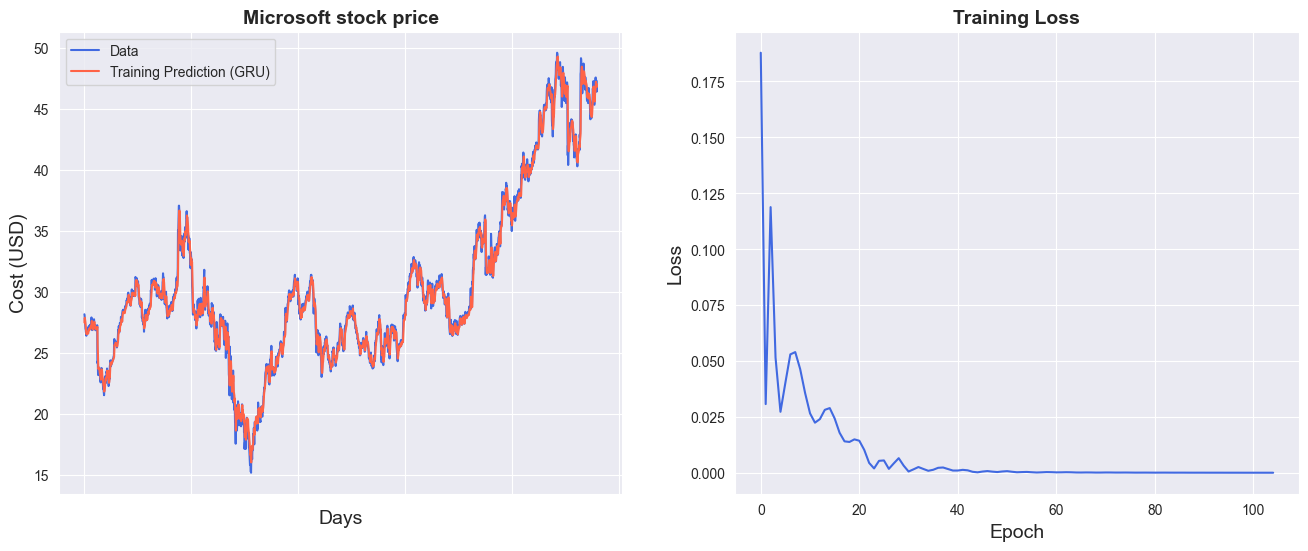

In [100]:

import seaborn as sns
sns.set_style("darkgrid")    

fig = plt.figure()
fig.subplots_adjust(hspace=0.2, wspace=0.2)

plt.subplot(1, 2, 1)
ax = sns.lineplot(x = original.index, y = original[0], label="Data", color='royalblue')
ax = sns.lineplot(x = predict.index, y = predict[0], label="Training Prediction (GRU)", color='tomato')
ax.set_title('Microsoft stock price', size = 14, fontweight='bold')
ax.set_xlabel("Days", size = 14)
ax.set_ylabel("Cost (USD)", size = 14)
ax.set_xticklabels('', size=10)


plt.subplot(1, 2, 2)
ax = sns.lineplot(data=hist, color='royalblue')
ax.set_xlabel("Epoch", size = 14)
ax.set_ylabel("Loss", size = 14)
ax.set_title("Training Loss", size = 14, fontweight='bold')
fig.set_figheight(6)
fig.set_figwidth(16)

In [101]:

import math, time
from sklearn.metrics import mean_squared_error

# make predictions
y_test_pred = model(x_test)

# invert predictions
y_train_pred = scaler.inverse_transform(y_train_pred.detach().numpy())
y_train = scaler.inverse_transform(y_train_gru.detach().numpy())
y_test_pred = scaler.inverse_transform(y_test_pred.detach().numpy())
y_test = scaler.inverse_transform(y_test_gru.detach().numpy())

# calculate root mean squared error
trainScore = math.sqrt(mean_squared_error(y_train[:,0], y_train_pred[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(y_test[:,0], y_test_pred[:,0]))
print('Test Score: %.2f RMSE' % (testScore))
gru.append(trainScore)
gru.append(testScore)
gru.append(training_time)

Train Score: 0.59 RMSE
Test Score: 2.99 RMSE


In [102]:
# shift train predictions for plotting
trainPredictPlot = np.empty_like(price_microsoft)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[lookback:len(y_train_pred)+lookback, :] = y_train_pred

# shift test predictions for plotting
testPredictPlot = np.empty_like(price_microsoft)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(y_train_pred)+lookback-1:len(price_microsoft)-1, :] = y_test_pred

original = scaler.inverse_transform(price_microsoft['Close'].values.reshape(-1,1))

predictions = np.append(trainPredictPlot, testPredictPlot, axis=1)
predictions = np.append(predictions, original, axis=1)
result = pd.DataFrame(predictions)

In [103]:
import pandas as pd
import numpy as np
import plotly.graph_objects as go

# Load data (with Date column parsed as index)
data = pd.read_csv(
    "GOOGL_2006-01-01_to_2018-01-01.csv",
    parse_dates=True,
    index_col=0
)

# Display info
print("\n--- Data Overview ---")
print(data.info())
print("\nHead of Data:")
print(data.head())

# Extract Close price
price_google = data[['Close']]

# Create the Plotly figure
fig = go.Figure()

fig.add_trace(go.Scatter(
    x=price_google.index,
    y=price_google['Close'],
    mode='lines',
    name='Google Close Price',
    line=dict(color='cyan', width=2)
))

# Update layout
fig.update_layout(
    title='Google Stock Closing Price (2006–2018)',
    title_x=0.5,
    xaxis=dict(
        title='Date',
        showline=True,
        showgrid=True,
        linecolor='white',
        linewidth=2,
        tickfont=dict(family='Rockwell', size=12, color='white')
    ),
    yaxis=dict(
        title=dict(
            text='Close (USD)',
            font=dict(family='Rockwell', size=12, color='white')
        ),
        showline=True,
        showgrid=True,
        linecolor='white',
        linewidth=2,
        ticks='outside',
        tickfont=dict(family='Rockwell', size=12, color='white')
    ),
    showlegend=True,
    template='plotly_dark',
    plot_bgcolor='rgba(0,0,0,0)',
    paper_bgcolor='rgba(0,0,0,0)'
)

fig.show()



--- Data Overview ---
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3019 entries, 2006-01-03 to 2017-12-29
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    3019 non-null   float64
 1   High    3019 non-null   float64
 2   Low     3019 non-null   float64
 3   Close   3019 non-null   float64
 4   Volume  3019 non-null   int64  
 5   Name    3019 non-null   object 
dtypes: float64(4), int64(1), object(1)
memory usage: 165.1+ KB
None

Head of Data:
              Open    High     Low   Close    Volume   Name
Date                                                       
2006-01-03  211.47  218.05  209.32  217.83  13137450  GOOGL
2006-01-04  222.17  224.70  220.09  222.84  15292353  GOOGL
2006-01-05  223.22  226.00  220.97  225.85  10815661  GOOGL
2006-01-06  228.66  235.49  226.85  233.06  17759521  GOOGL
2006-01-09  233.44  236.94  230.70  233.68  12795837  GOOGL
